# Lecture 4 — Probability & Statistics: III

[Open this notebook in Google Colab](https://colab.research.google.com/github/daanmeerburg/Statistics_meerburg_2026//blob/main/Lectures/Lecture_04_PDM.ipynb)


**Lecturer:** P. D. Meerburg 

*Heavily based on materials by Davide Gerosa (astroML, 2022) and collaborators. See [here](https://github.com/dgerosa/astrostatistics_bicocca_2023/blob/main/README.md) for credits.*

##### Reading:

- [Ivezic textbook](https://press.princeton.edu/books/hardcover/9780691198309/statistics-data-mining-and-machine-learning-in-astronomy) Chapter 3. 



---

>## Central Limit Theorem <a class="anchor" id="one"></a>

One of the reasons that a Gaussian (or Normal) Distribution is so common is because of the **Central Limit Theorem**:

> For an arbitrary distribution, $h(x)$, with a well-defined mean, $\mu$, and standard deviation, $\sigma$ (i.e. tails should fall off faster than $1/x^2$) the mean of $N$ values \{$x_i$\} drawn from the distribution will follow a Gaussian Distribution with $\mathcal{N}(\mu,\sigma/\sqrt{N})$. (A Cauchy distribution is one example where this fails.)

This theorem is the foundation for performing repeated measurements in order to improve the accuracy of the outcome of an experiment. This is truly amazing! No matter what distribution you start off with (provided it has a well defined mean and standard deviation) or the measurement process itself, repeated batches of $N$ draws will follow a Gaussian centered around the mean.  

The **Weak Law of Large Numbers** (aka **Bernoulli's Theorem**) further says that the sample mean will converge to the distribution mean as $N$ increases.

Let's wrap our heads around what this means with some examples. 

We'll first consider $h(x) = \mathcal{N}(\mu=0.5,\sigma=1/\sqrt{12})$. According to the Central Limit Theorem, taking the mean of many batches of $N$ random samples should result in a normal distribution with $\mathcal{N}(\mu=0.5,\sigma=1/\sqrt{12}/\sqrt{N})$.

In [17]:
# Check if corner is installed; if not, install it (works in Colab and Jupyter)
try:
    import corner
except ImportError:
    print("corner not found — installing...")
    !pip install corner
    import corner


corner not found — installing...


In [2]:
# Execute this cell
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
# enable inline plotting
%config InlineBackend.figure_format='retina' 
# for higher-res figures

import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstats
from tqdm.notebook import tqdm # for progress bars
plt.rcParams['figure.figsize'] = [8, 8] # set default figure size -- you can change this


Text(0, 0.5, 'pdf')

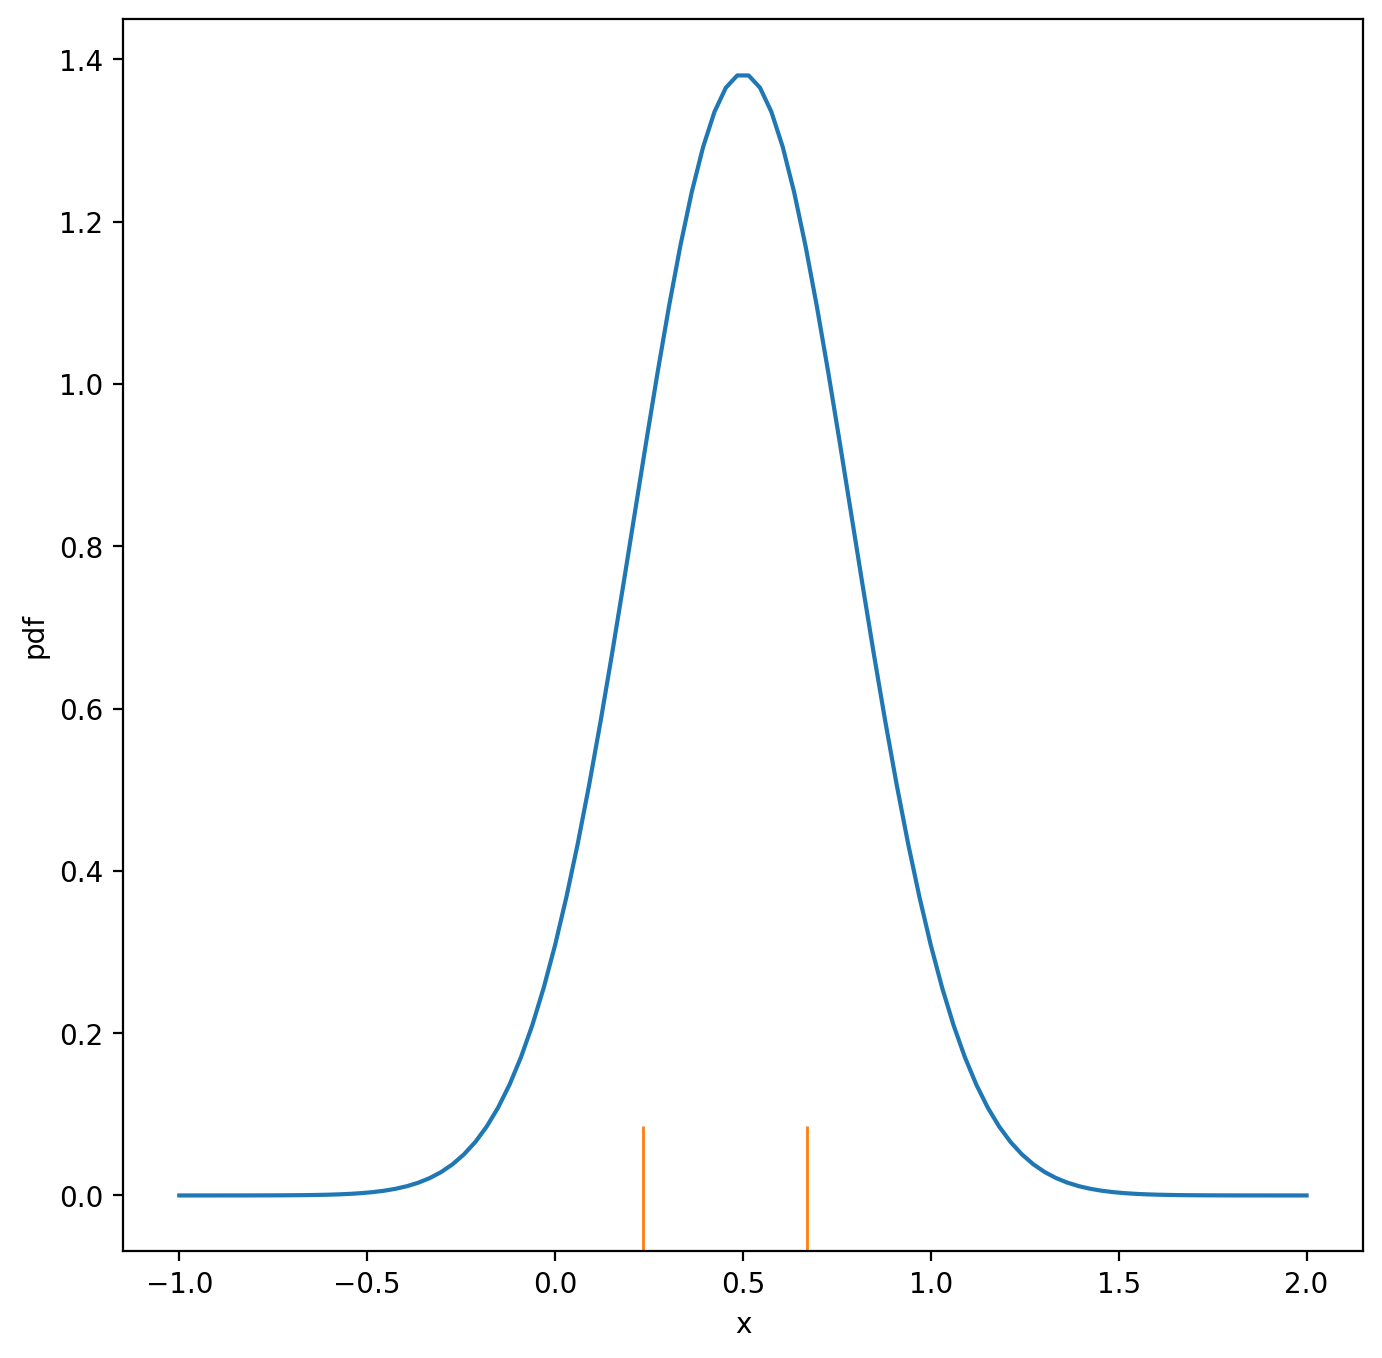

In [5]:
N = 2 # Number of draws
mu = 0.5 # Location parameter
sigma_h = 1.0 / np.sqrt(12) # scale parameter of h(x)

xgrid = np.linspace(-1,2,100)  # x values for pdf plot
distG = scipy.stats.norm(loc=mu, scale=sigma_h) # Gaussian distribution
plt.plot(xgrid, distG.pdf(xgrid)) # plot Gaussian pdf

x = np.random.normal(mu, sigma_h,N) # Two random draws from Gaussian with mean mu and std sigma_h
plt.plot(x, 0*x, '|', markersize=50) # plot the draws
plt.xlabel('x')
plt.ylabel('pdf')

Now let's average those two draws and plot the result (in the same panel). Do it as a histogram for 100,000 batches of 2 samples each. Use a stepfilled histogram that is normalized with 50% transparency and 100 bins.

  0%|          | 0/100000 [00:00<?, ?it/s]

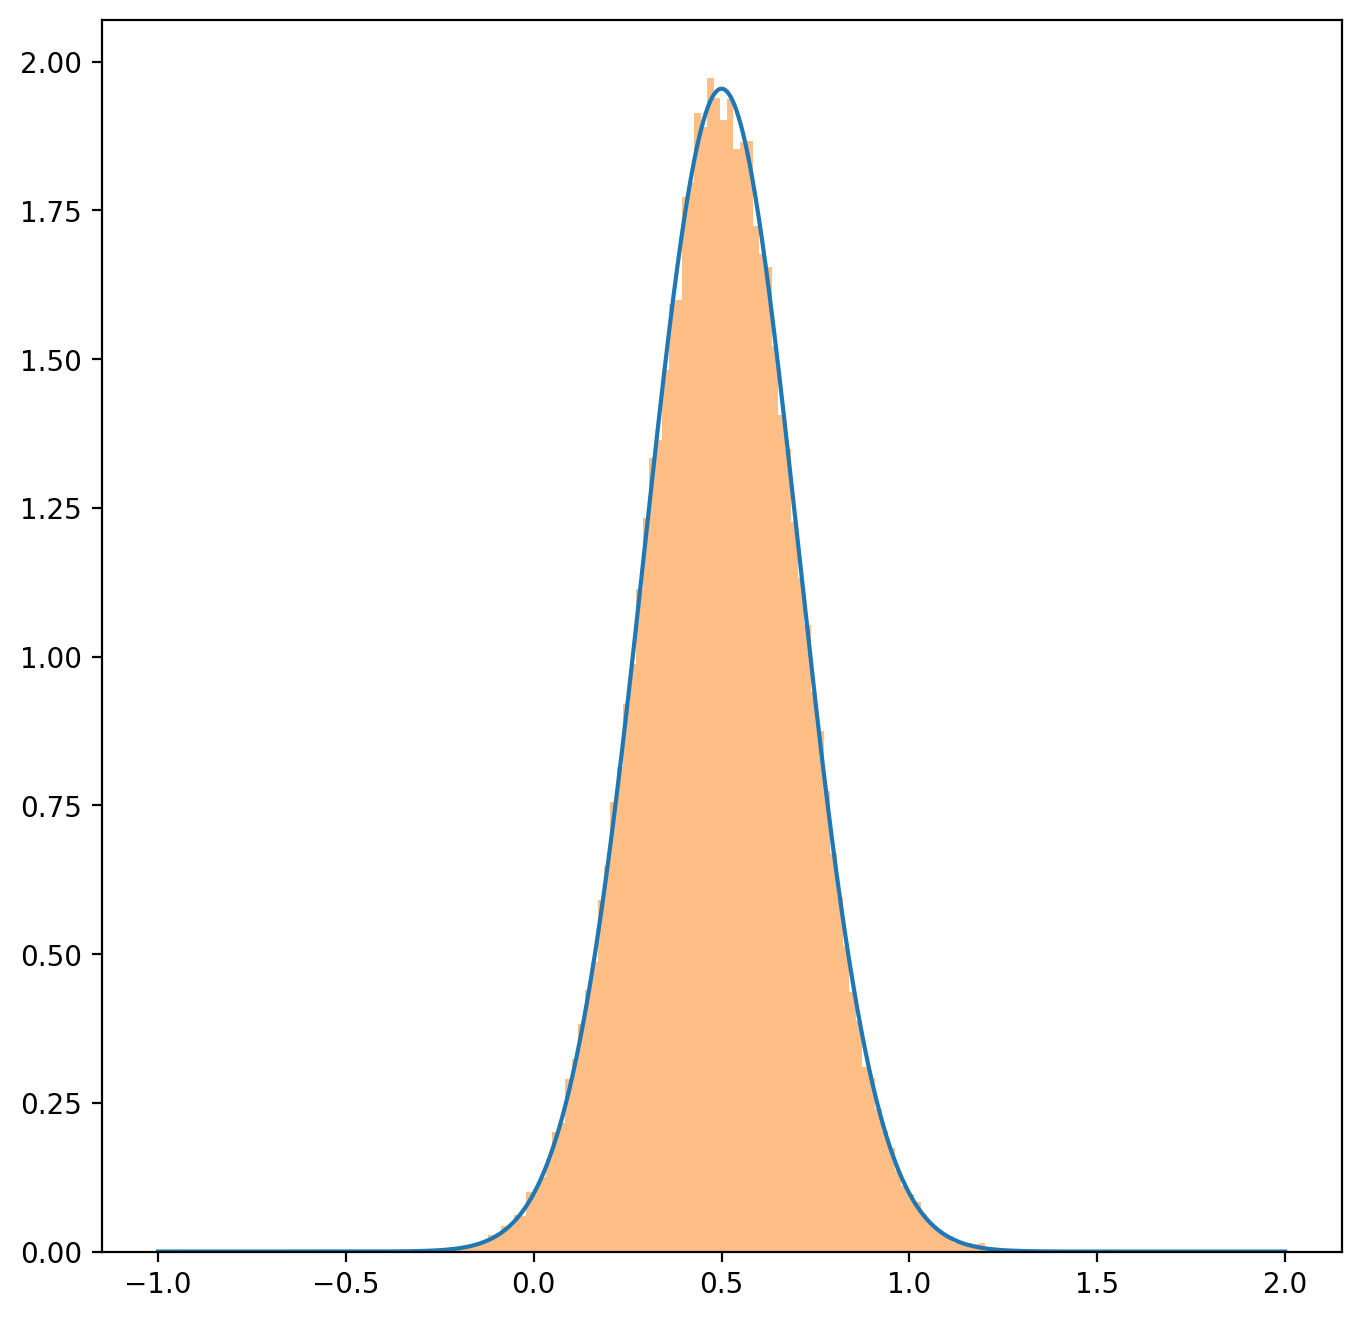

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

N = 2 # Number of draws
mu = 0.5 # Location
sigma_h = 1.0 / np.sqrt(12) # scale of h(x)
sigma_cl = sigma_h / np.sqrt(N) # scale of mean error distribution

xgrid = np.linspace(-1,2,10000)  # x values for pdf plot

# plot the distribution of means according to central limit theorem
distG = scipy.stats.norm(mu, sigma_cl) # Gaussian distribution of means
plt.plot(xgrid, distG.pdf(xgrid)) # plot Gaussian pdf of means

# Add a histogram that is the mean of 100,000 batches of N draws
yy = [] # empty array to hold means
for i in tqdm(np.arange(100000)):
    xx = np.random.normal(loc=mu, scale=sigma_h, size=N) # N random draws
    yy.append(np.average(xx)) # Append average of those random draws to the end of the array

plt.hist(yy, bins=100, histtype='stepfilled', alpha=0.5, density=True);

So to interpret this properly. If I do an experiment N times, and the true mean is given by 0.5, I will find the mean of the mean to have an std that is given by the std devided by the square root if the number of samples. Note that I have to consider 100000 batches to be able to determine the distribution.   

Well that's great and all, but didn't I say this worked for arbitrary generating distributions $h(x)$ so long as their mean and standard deviations were well defined? Let's check this out for a uniform distribution with $\mu=0.5$ and width$ =1$, such that the standard deviation is $\sigma=1/\sqrt{12}$ (see *Lecture 3*).

  0%|          | 0/100000 [00:00<?, ?it/s]

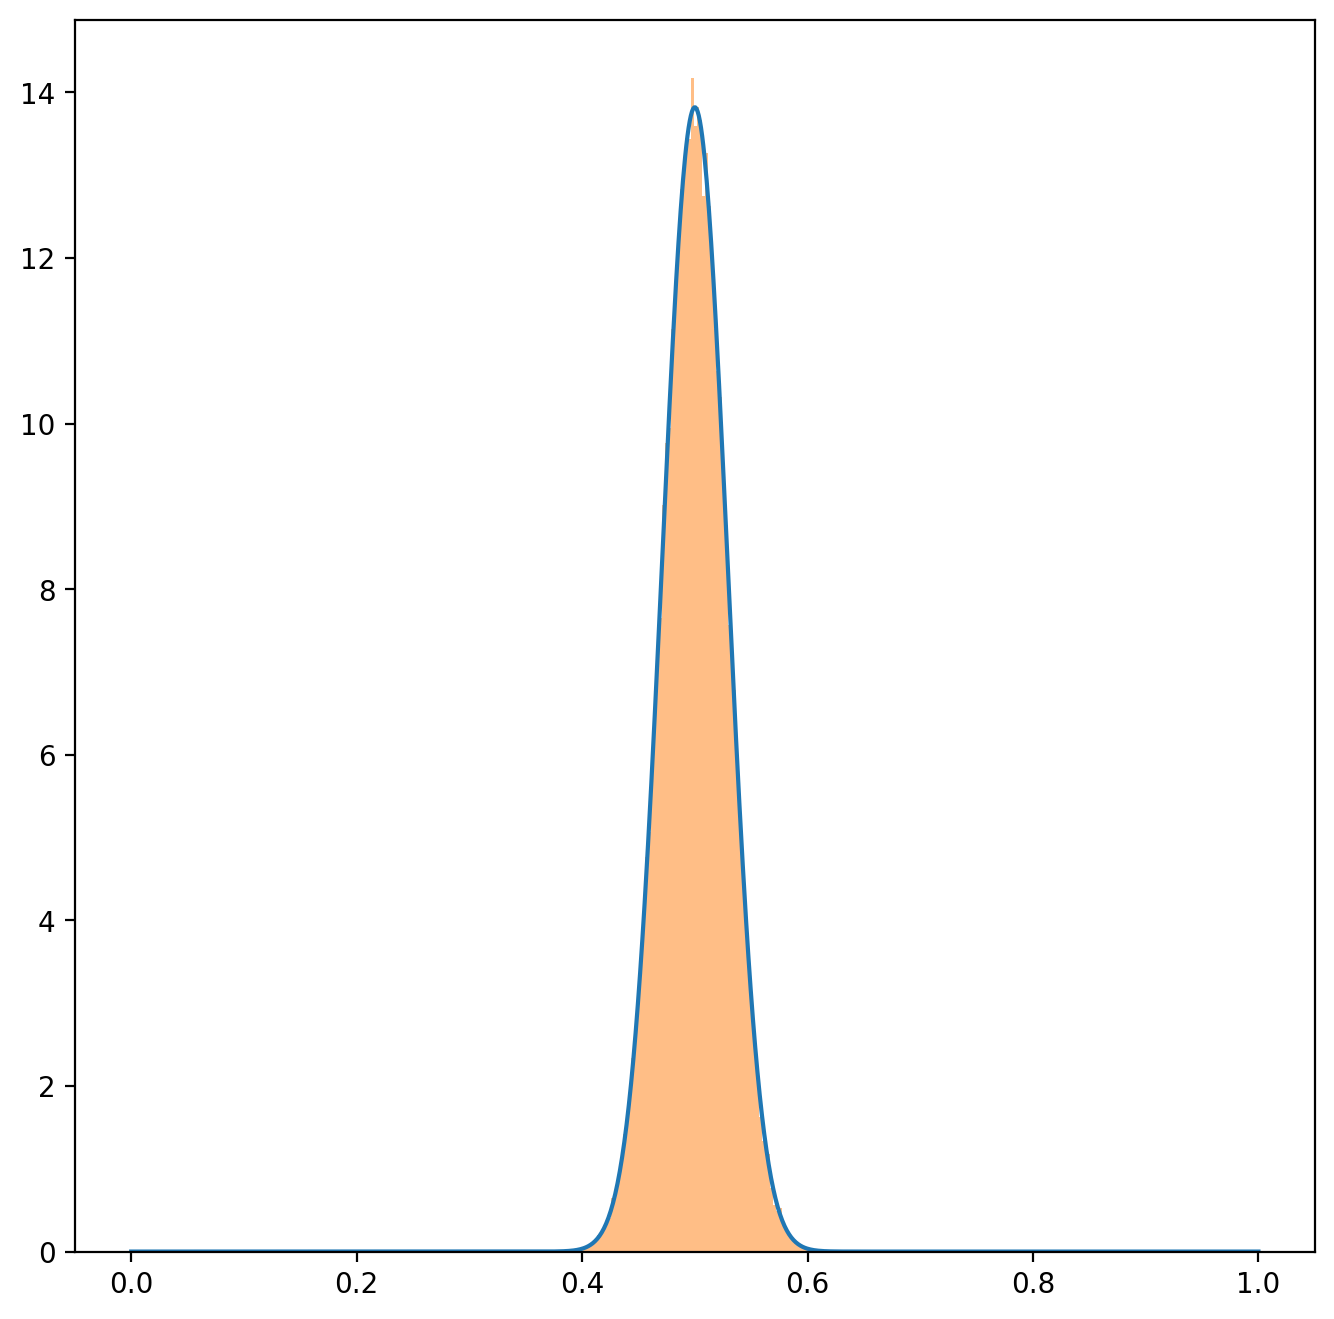

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

N = 100 # Number of draws

xmin=0 # Minimum value of uniform distribution
xmax=1 # Maximum value of uniform distribution
mu = 0.5 # Location parameter
sigma_h = 1.0 / np.sqrt(12) # scale parameter of h(x)
sigma_cl = sigma_h / np.sqrt(N) # scale of mean error distribution
xgrid = np.linspace(0,1,1000) # x values for pdf plot 

# plot the distribution of means according to central limit theorem
distG = scipy.stats.norm(mu, sigma_cl) # Distribution of means
plt.plot(xgrid, distG.pdf(xgrid)) # plot Gaussian pdf of means

# Add a histogram that is the mean of 100,000 batches of N draws
yy = []
for i in tqdm(np.arange(100000)):
    xx = np.random.uniform(0,1,N) # N random draws
    yy.append(np.average(xx)) # Append average of those random draws to the end of the array

plt.hist(yy, bins=100, histtype='stepfilled', alpha=0.5, density=True);


Now that's impressive! Now instead of averaging 2 draws, average 3.  Then do it for 10.  Then for 100.  Each time for 100,000 samples. The error should go down as $1/\sqrt{N}$. 


For 100 you will note that your draws are clearly sampling the full range, but the means of those draws are in a *much* more restrictred range. Moreover they are very closely following a Normal Distribution. 

A cleaner plot from the textbook:

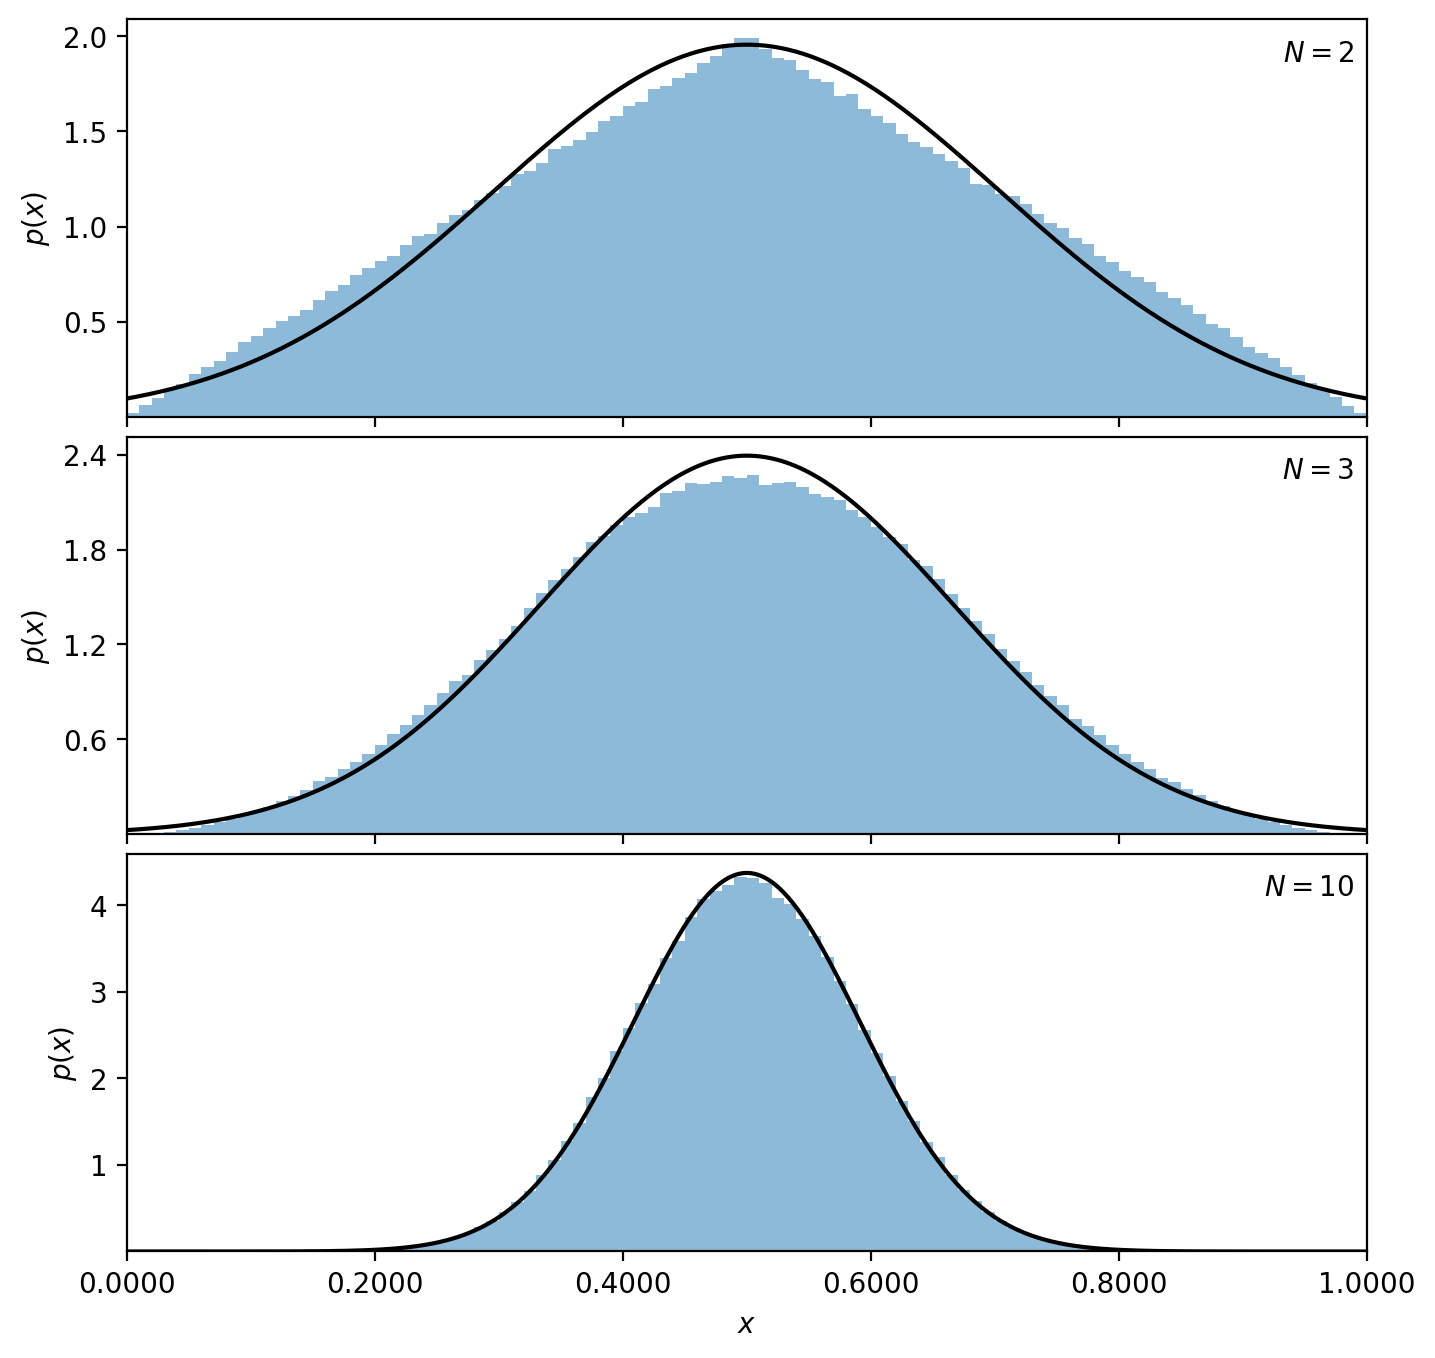

In [14]:
r"""
Example of central limit theorem
--------------------------------
Figure 3.20.

An illustration of the central limit theorem. The histogram in each panel shows
the distribution of the mean value of N random variables drawn from the (0, 1)
range (a uniform distribution with :math:`\mu = 0.5` and W = 1; see eq. 3.39).
The distribution for N = 2 has a triangular shape and as N increases it becomes
increasingly similar to a Gaussian, in agreement with the central limit
theorem. The predicted normal distribution with :math:`\mu = 0.5` and
:math:`\sigma = 1/ \sqrt{12 N}` is shown by the line. Already for N = 10,
the "observed" distribution is essentially the same as the predicted
distribution.
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

#------------------------------------------------------------
# Generate the uniform samples
N = [2, 3, 10]

np.random.seed(42)
x = np.random.random((max(N), int(1E6)))

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(hspace=0.05)

for i in range(len(N)):
    ax = fig.add_subplot(3, 1, i + 1)

    # take the mean of the first N[i] samples
    x_i = x[:N[i], :].mean(0)

    # histogram the data
    ax.hist(x_i, bins=np.linspace(0, 1, 101),
            histtype='stepfilled', alpha=0.5, density=True)

    # plot the expected gaussian pdf
    mu = 0.5
    sigma = 1. / np.sqrt(12 * N[i])
    dist = norm(mu, sigma)
    x_pdf = np.linspace(-0.5, 1.5, 1000)
    ax.plot(x_pdf, dist.pdf(x_pdf), '-k')

    ax.set_xlim(0.0, 1.0)
    ax.set_ylim(0.001, None)

    ax.xaxis.set_major_locator(plt.MultipleLocator(0.2))
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))

    ax.text(0.99, 0.95, r"$N = %i$" % N[i],
            ha='right', va='top', transform=ax.transAxes)

    if i == len(N) - 1:
        ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.4f'))
        ax.set_xlabel(r'$x$')
    else:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax.set_ylabel('$p(x)$')

plt.show()


This is truly mind blowing, and a wonderful example of the power and generalizability of statistics in tackling the measured properties of arbitrary distributions. Even if you've never heard of or understood the Central Limit Theorem, you have been implicitly using it your entire career so far. 


### An example from research in cosmology 


In weak gravitational lensing surveys (DES, LSST, Euclid), the shear measured from each galaxy is contaminated by many small biases: intrinsic shape noise, PSF modeling errors, atmospheric seeing variations, pixel noise, and detector systematics. Each of these effects has a different physical origin and a different statistical distribution. However, when shear estimators are constructed by combining billions of galaxies, these heterogeneous biases add together. The Central Limit Theorem guarantees that the sum of many small uncertainties tends toward a Gaussian distribution, regardless of the shape of each individual component. This is why shear calibration errors in cosmology are typically modeled as Gaussian nuisance parameters.
(See figure 5: Sheldon & Huff 2017, arXiv:1702.02601.) 

In my own researh we often find that the error on parameters reduces as $1/\sqrt{N}$. Obvisouly we do not have $N$ universe, but what we do have is the cosmologcal principle. This principle states thet the universe is isotropic and homogeneous on large scales. This translates into statistical isotropy and homogeneity. That then leads to the fact that each 'scale' independently measures the properties of the universe. However, there are many more small scales compared to large ones. As a result, here $N$ is the number of observed independent measures which can be determined via e.g. $V_{\rm survey} / V_{\rm min}$. Here $V_{\rm survey}$ is the total volume of the experiment (which could the size of the current horizon), and $V_{\rm min}$ the volume over which the Universe behaves like a single independent random draw. 


>## Bivariate and Multivariate pdfs <a class="anchor" id="two"></a>

Up to now we have been dealing with one-dimensional distribution functions.  Let's now consider a two dimensional distribution $h(x,y)$ where $$\int_{-\infty}^{\infty}dx\int_{-\infty}^{\infty}h(x,y)dy = 1.$$  $h(x,y)$ is telling us the probability that $x$ is between $x$ and $dx$ and *also* that $y$ is between $y$ and $dy$.

Then we have the following definitions:

$$\sigma^2_x = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(x-\mu_x)^2 h(x,y) dx dy$$

$$\sigma^2_y = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(y-\mu_y)^2 h(x,y) dx dy$$

$$\mu_x = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}x h(x,y) dx dy$$

$$\sigma_{xy} = Cov(x,y) = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(x-\mu_x) (y-\mu_y) h(x,y) dx dy$$

If $x$ and $y$ are uncorrelated, then we can treat the system as two independent 1-D distributions.  This means that choosing a range on one variable has no effect on the distribution of the other.

We can write a 2-D Gaussian pdf as
$$p(x,y|\mu_x,\mu_y,\sigma_x,\sigma_y,\sigma_{xy}) = \frac{1}{2\pi \sigma_x \sigma_y \sqrt{1-\rho^2}} \exp\left(\frac{-z^2}{2(1-\rho^2)}\right),$$

where $$z^2 = \frac{(x-\mu_x)^2}{\sigma_x^2} + \frac{(y-\mu_y)^2}{\sigma_y^2} - 2\rho\frac{(x-\mu_x)(y-\mu_y)}{\sigma_x\sigma_y},$$

with $$\rho = \frac{\sigma_{xy}}{\sigma_x\sigma_y}$$
as the **(dimensionless) correlation coefficient**. 

If $x$ and $y$ are perfectly correlated then $\rho=\pm1$ and if they are uncorrelated, then $\rho=0$.

**The pdf is now not a histogram, but rather a series of contours in the $x-y$ plane.**   

These are centered at $(x=\mu_x, y=\mu_y)$ and are tilted at angle $\alpha$, which is given by
$$\tan(2 \alpha) = 2\rho\frac{\sigma_x\sigma_y}{\sigma_x^2-\sigma_y^2} = 2\frac{\sigma_{xy}}{\sigma_x^2-\sigma_y^2}.$$

For example (Ivezic, Figure 3.22):
![Ivezic, Figure 3.22](http://www.astroml.org/_images/fig_bivariate_gaussian_1.png)

We can define new coordinate axes that are aligned with the minimum and maximum widths of the distribution. (Or in different terminology, the semi-minor and semi-major axes of the ellipse). These are called the **principal axes** and are given by

$$P_1 = (x-\mu_x)\cos\alpha + (y-\mu_y)\sin\alpha,$$

and

$$P_2 = -(x-\mu_x)\sin\alpha + (y-\mu_y)\cos\alpha.$$

The widths in this (rotated) coordinate system are

$$\sigma^2_{1,2} = \frac{\sigma_x^2+\sigma_y^2}{2}\pm\sqrt{\left(\frac{\sigma_x^2-\sigma_y^2}{2}\right)^2 + \sigma^2_{xy}}.$$

Note that **the correlation vanishes in this coordinate system (by definition)** and the bivariate Gaussian is just a product of two univariate Gaussians.  

This concept will be crucial for understanding ***Principal Component Analysis*** (perhaps something you will see in later courses, or in a BSc project), where PCA extends this idea to even more dimensions.

In the univariate case we used $\overline{x}$ and $s$ to *estimate* $\mu$ and $\sigma$.  In the bivariate case we estimate 5 parameters: $(\overline{x},\overline{y},s_x,s_y,s_{xy})$.  

As with the univariate case, it is important to realize that **outliers can bias these estimates and that it may be more appropriate to use the median rather than the mean as a more robust estimator for $\mu_x$ and $\mu_y$**.  

Similarly we want robust estimators for the other parameters of the fit.  We won't go into that in detail right now, but see Ivezic, Figure 3.23 for an example:

![Ivezic, Figure 3.23](http://www.astroml.org/_images/fig_robust_pca_1.png)

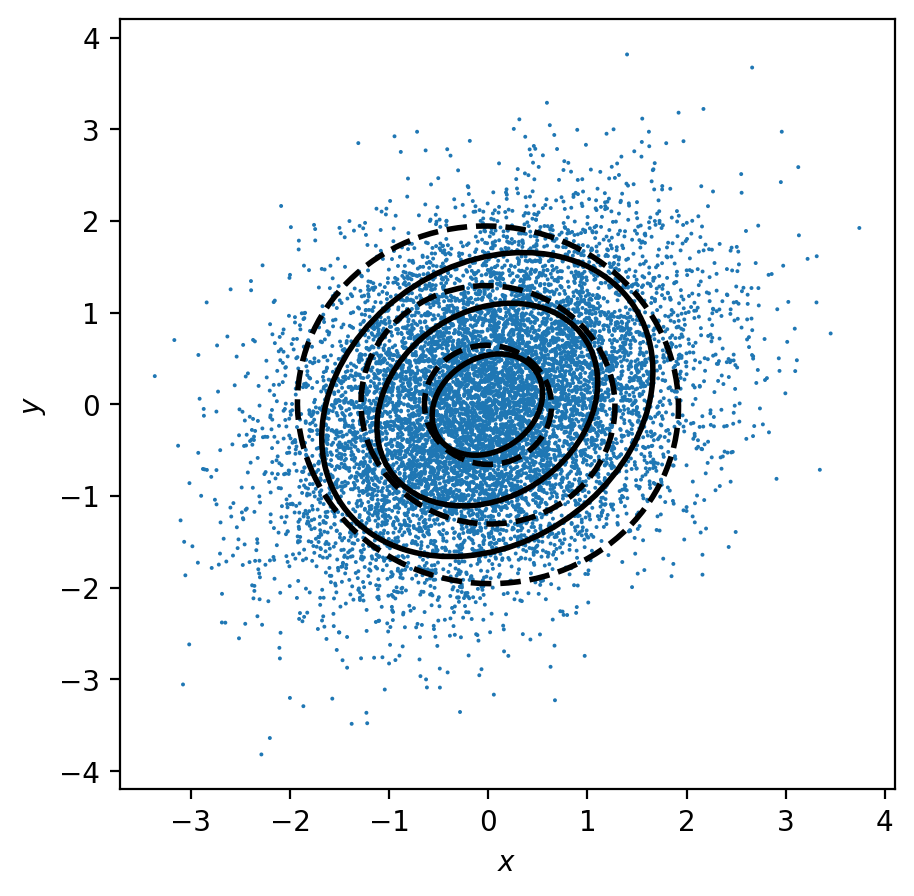

In [15]:
# Base code drawn from Ivezic, Figure 3.22, edited by G. Richards to simplify the example

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from astroML.stats.random import bivariate_normal
from astroML.stats import fit_bivariate_normal

# directional means
mux = 0
muy = 0

# directional standard deviations
sigx = 1.0
sigy = 1.0

# covariance
sigxy = 0.3

#------------------------------------------------------------
# Create 10,000 points from a multivariate normal distribution
mean = np.array([mux, muy])
cov = np.array([[sigx**2, sigxy], [sigxy, sigy**2]])
x, y = np.random.multivariate_normal(mean, cov, 10000).T

#------------------------------------------------------------
# Add 2000 outliers drawn from a 5 times wider distribution
# with opposite covariance
xout, yout = np.random.multivariate_normal(mean, 
                                           5*cov*np.array([[1,-1],[-1,1]]), 
                                           2000).T

xt = np.append(x,xout)
yt = np.append(y,yout)

# Fit those data with a bivariate normal distribution
# Use robust and non-robust statistics estimates
mean_nr, sigma_x_nr, sigma_y_nr, alpha_nr = fit_bivariate_normal(xt, yt, robust=False)
mean_r, sigma_x_r, sigma_y_r, alpha_r = fit_bivariate_normal(xt, yt, robust=True)

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

plt.scatter(x,y,s=2,edgecolor='none')

# draw 1, 2, 3-sigma ellipses over the distribution
for N in (1, 2, 3):
    ax.add_patch(Ellipse(mean_nr, N * sigma_x_nr, N * sigma_y_nr, 
                         angle=alpha_nr * 180./np.pi, lw=2, 
                         ec='k', fc='none', ls='dashed'))
    ax.add_patch(Ellipse(mean_r, N * sigma_x_r, N * sigma_y_r, 
                         angle=alpha_r * 180./np.pi, lw=2, 
                         ec='k', fc='none'))
    
ax.set_xlabel('$x$');
ax.set_ylabel('$y$');

The non-robust estimates (***dashed lines***) give biased sigma ellipses due to the outliers. The robust estimates (***solid lines***) do much better.

We can generalize the way we describe **Gaussian distributions in multiple dimensions**, $M$, through the elegance of linear algebra. Instead of writing everything in terms of separate coordinates, we can bundle everything together in an $M$-dimensional coordinate vector $\vec{x}$, mean vector $\vec{\mu}$, and covariance matrix $\mathbf{C} = E([\vec{x}-\vec{\mu}][\vec{x}-\vec{\mu}]^T)$.

$$p(\vec{x}|\vec{\mu},\mathbf{C}) = \frac{1}{\sqrt{\mathrm{det}(2\pi\mathbf{C})}} \exp\left[-\frac{1}{2}(\vec{x}-\vec{\mu})^T \mathbf{C}^{-1} (\vec{x}-\vec{\mu}) \right] $$

where the components of the covariance matrix are given by 

$$ C_{kj} = \int_{-\infty}^\infty (x^k-\mu^k)(x^j-\mu^j)p(\vec{x}|\vec{\mu},\mathbf{C})\,d^M x $$

and 

$$ (\vec{x}-\vec{\mu})^T \mathbf{C}^{-1} (\vec{x}-\vec{\mu}) = \sum_{k=1}^M \sum_{j=1}^M [\mathbf{C}^{-1}]_{kj}(x^k-\mu^k)(x^j-\mu^j) $$

### Gaussian confidence levels in 2 dimensions

This discussion is inspired by Dan Foreman-Mackey's discussion in the context of the [corner](https://corner.readthedocs.io/en/latest/) software package: https://corner.readthedocs.io/en/latest/pages/sigmas/ 

In two dimensions, a Gaussian density can be described by

$$ \mathrm{pdf}(r) = \frac{1}{2\pi s^2}\exp\left[-\frac{1}{2}\left(\frac{r}{s}\right)^2\right] $$

with the cdf (using polar coordinates and implicitly integrating out the angle)

$$ \mathrm{cdf}(x) = 1 - \exp(-(x/s)^2/2) $$

This means that within "1-sigma" (x/s = 1), the Gaussian contains 1-exp(-0.5) $\sim 0.393$ or $39.3\%$ of the volume. Therefore in `corner`, the relevant 1-sigma levels for a 2D histogram of samples is 39% not 68%. 

If you are using `corner` and want the usual 68% of the "sample mass" definition of sigma, use the `levels` keyword argument when you call `corner.corner`.

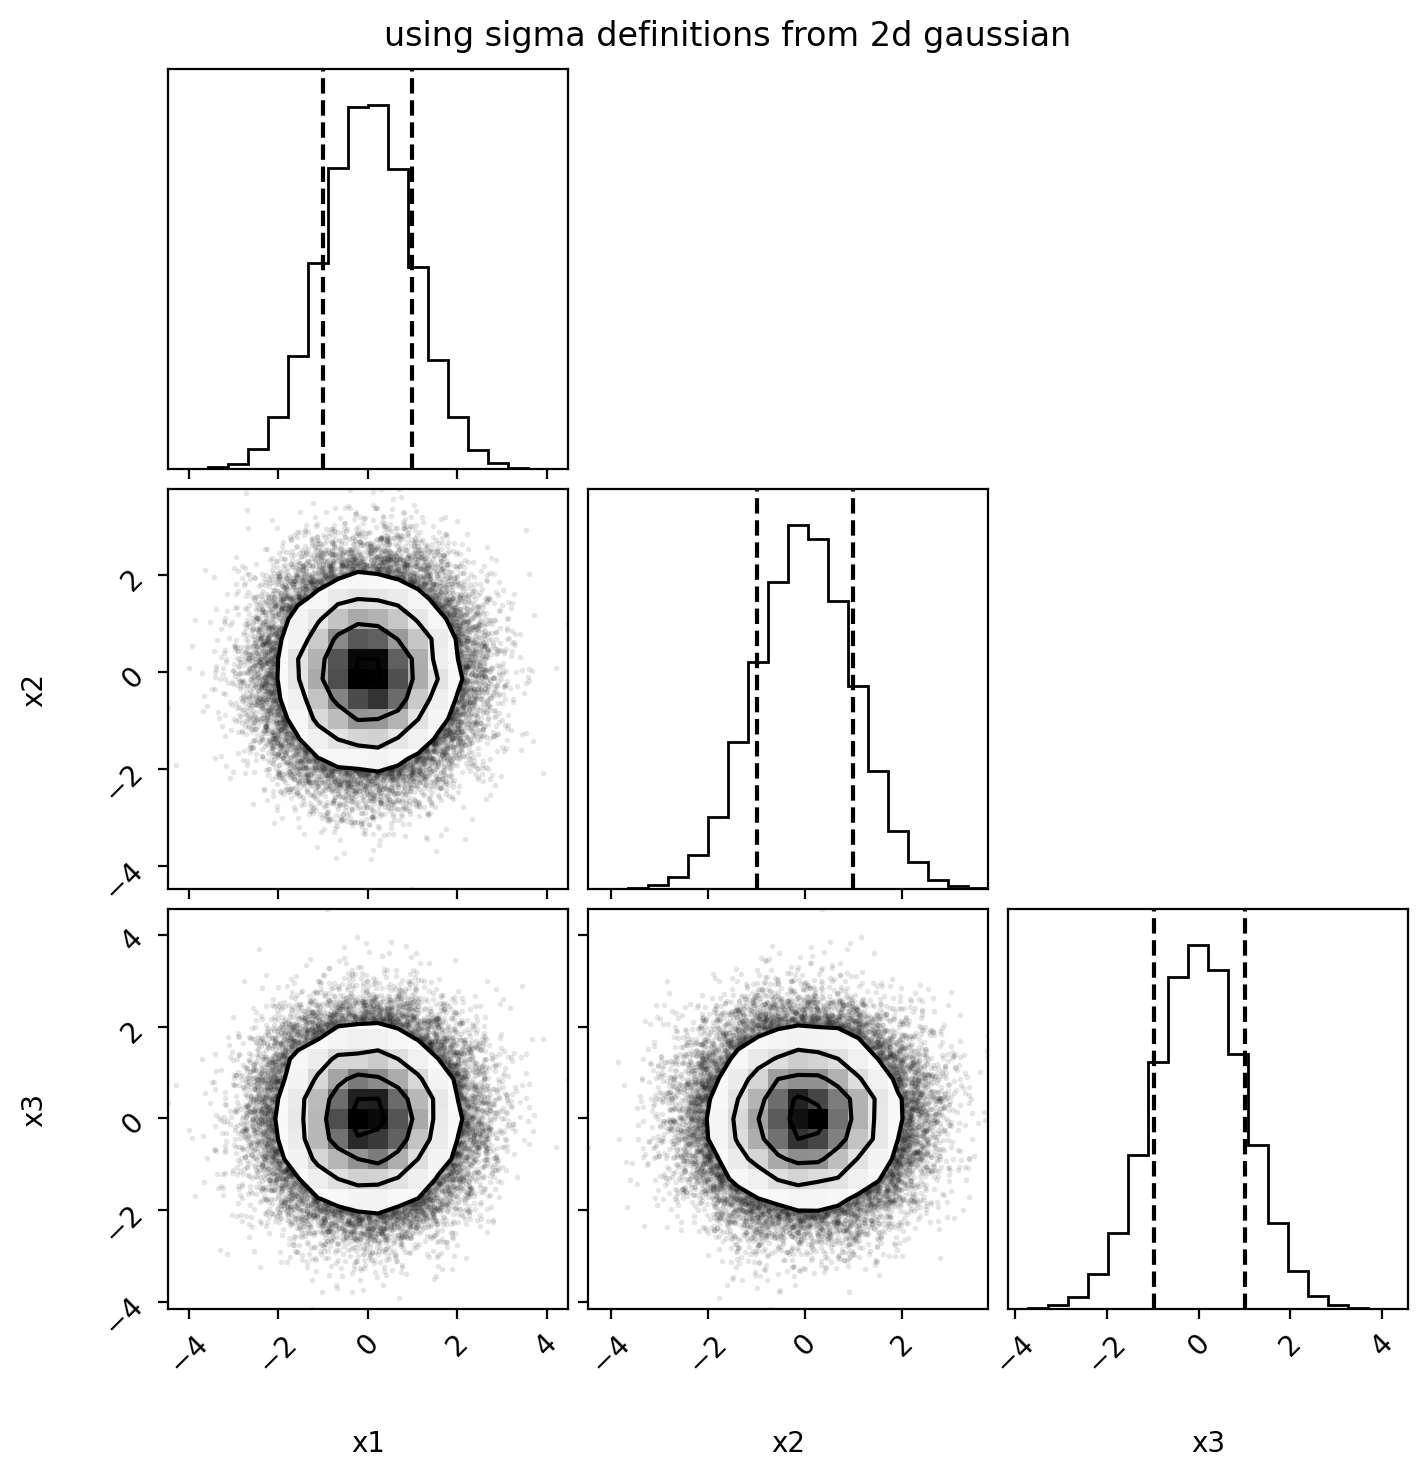

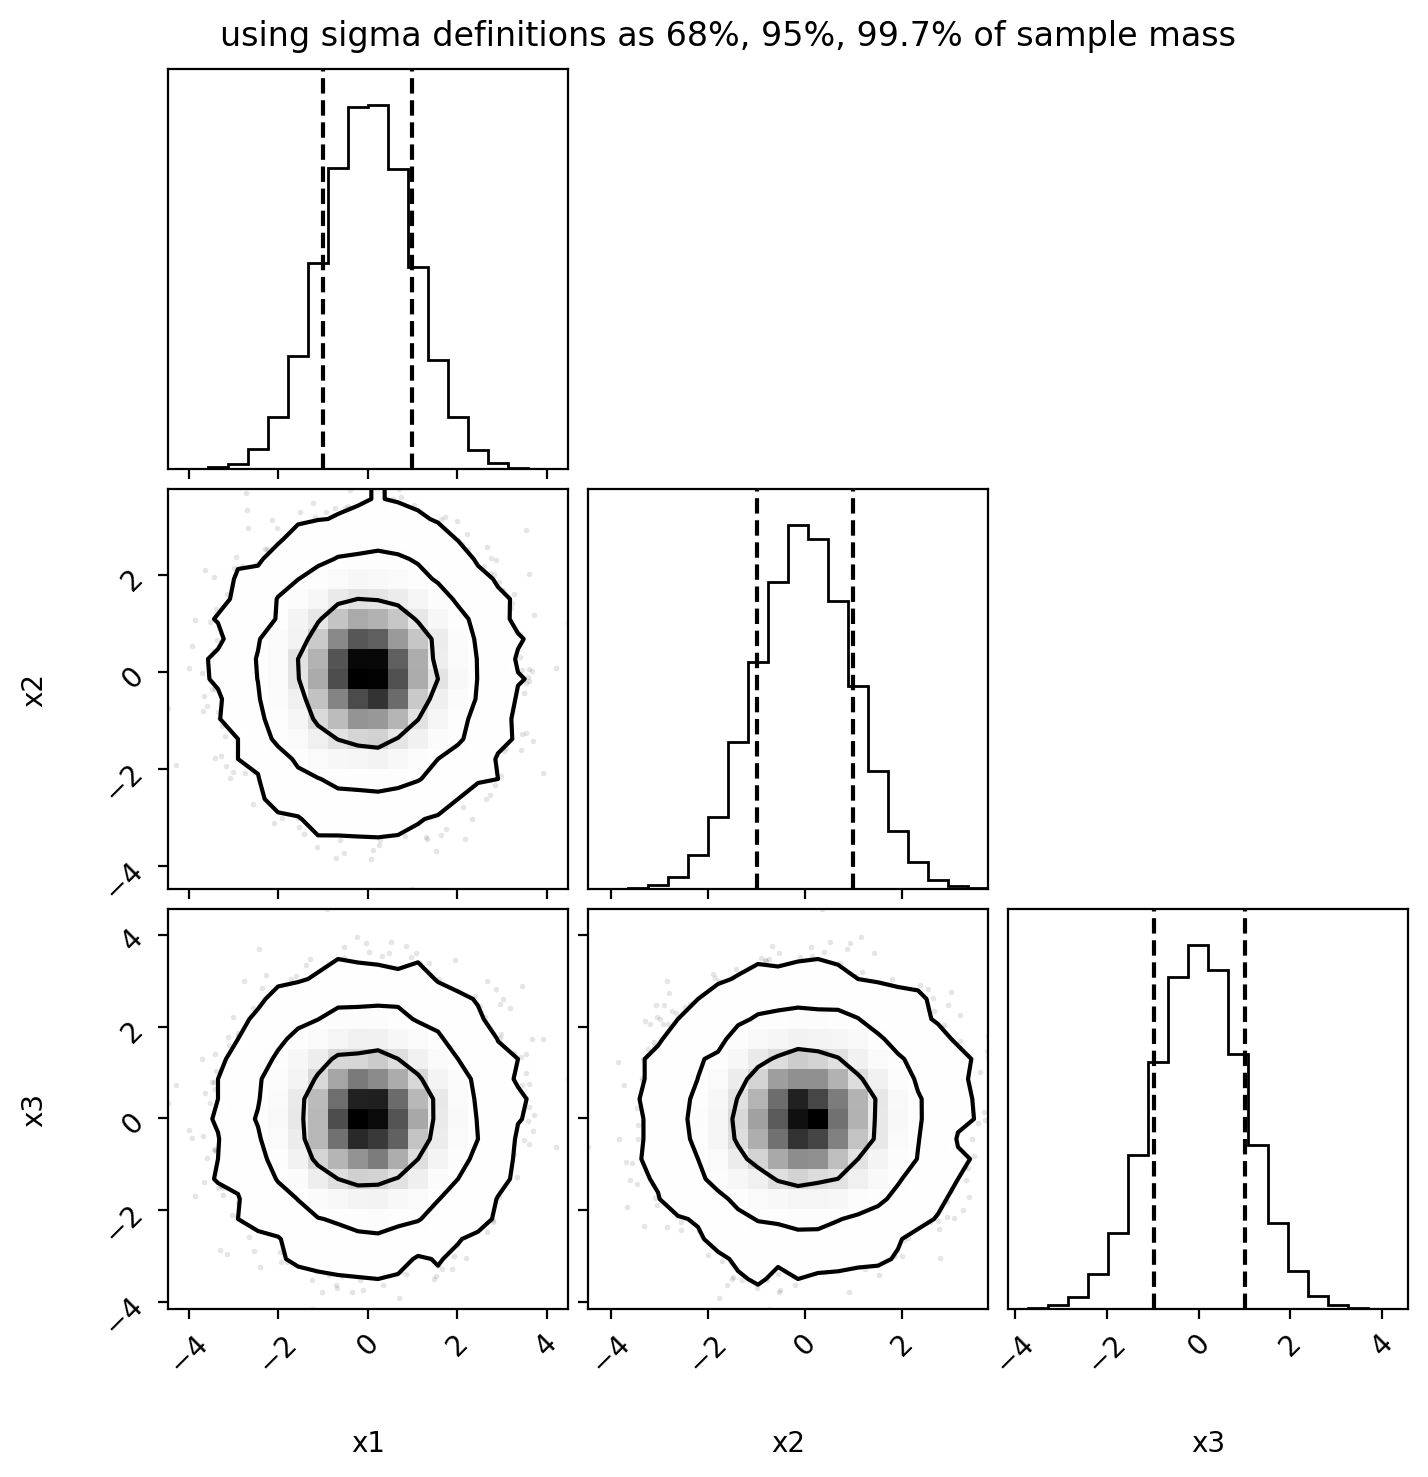

In [19]:
import corner

# Generate some fake data from a Gaussian
np.random.seed(42) # for reproducibility
x = np.random.randn(50000, 3) # 50,000 samples in 3 dimensions

# formally correct sigma definition
fig = corner.corner(x, quantiles=(0.16, 0.84), labels=['x1','x2','x3']) # no levels specified
fig.suptitle("using sigma definitions from 2d gaussian"); # title

# standard sample mass definition
fig = corner.corner(x, quantiles=(0.16, 0.84), levels=(0.68,0.95,0.997), labels=['x1','x2','x3']) # levels specified
fig.suptitle("using sigma definitions as 68%, 95%, 99.7% of sample mass"); # title

>## Correlation coefficients <a class="anchor" id="three"></a>

We'd like to be able to quantify how well two samples of data are correlated with one another (always remember that correlation does not imply causation...).

### Pearson's coefficient

Given two length-$N$ samples of data $\{x_i\}$ and $\{y_i\}$, Pearson's correlation coefficient is defined as

$$ r = \frac{\sum_{i=1}^N (x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum_{i=1}^N (x_i-\bar{x})^2}\sqrt{\sum_{i=1}^N (y_i-\bar{y})^2}} $$

where $-1\leq r\leq 1$, and $r=0$ for uncorrelated variables. Perfectly correlated would be $r =1$ and perfectly anti-correlated would be $r=-1$. 

If the pairs $(x_i,y_i)$ are drawn from uncorrelated univariate Gaussian distributions, then the distribution of $r$ follows a Student's $t$ distribution with $k=N-2$ degrees of freedom and $t = r\sqrt{(N-2)/(1-r^2)}$.

With this known "null hypothesis" distribution (i.e. for strictly uncorrelated data), a measured $r$ can be interpreted in terms of the significance with which we can reject the variables being correlated, e.g., if $N=10$ then the probability that a value of $r\geq 0.72$ arises just by chance noise fluctuations is $1\%$. 

There are two big problems with Pearson's coefficient though:
- It does not incorporate measurement uncertainties on the data.
- It is highly susceptible to outliers.

### Spearman's coefficient

Similar definition to Pearson's, with sample values replaced by their cumulative ranks. As we've seen, cumulative statistics based on rank (e.g. median vs mean) are more robust estimators than ones that use the actual sample values. The samples in each dataset are ranked from $1,\ldots,N$ in ascending order, with the largest value given the rank $N$. 

$$ r_S = \frac{\sum_{i=1}^N (R^x_i-\bar{R^x})(R^y_i-\bar{R^y})}{\sqrt{\sum_{i=1}^N (R^x_i-\bar{R^x})^2}\sqrt{\sum_{i=1}^N (R^y_i-\bar{R^y})^2}}. $$

The distribution of $r_S$ is the same as for Pearson's, except in the definition of the test statsitic $t$, $r$ is replaced by $r_S$.

### Kendall's coefficient

Kendall's coefficient uses the sample ranks, but does not take rank differences like in Spearman's coefficient. Instead, we compare the relative number of *concordant* and *discordant* pairs. 

**Concordant pairs** are where the differences in values between a pair of samples $j$ and $k$ have the same sign in $x$ and $y$, i.e., $(x_j-x_k)(y_j-y_k)>0$.

**Discordant pairs** are where the differences in values between a pair of samples $j$ and $k$ have the different signs in $x$ and $y$, i.e., $(x_j-x_k)(y_j-y_k)<0$.

*For perfectly correlated data, all $N(N-1)/2$ sample pairs will be concordant. For perfectly anti-correlated data, all pairs will be discordant.* 

Kendall's $\tau$ is then computed as

$$ \tau = 2\frac{N_c-N_d}{N(N-1)}.$$

In the following example that reproduces *Ivezic Fig. 3.24*, samples of $x$ and $y$ from a bivariate normal distribution with/without outlier contamination are assessed for correlation using each of the above. It is clear that Pearson's suffers considerably from outliers, while the rank-based coefficients are more resilient. 

Correlation coefficient: 0.6
@pickle_results: using precomputed results from 'fig_correlations_dump.pkl'


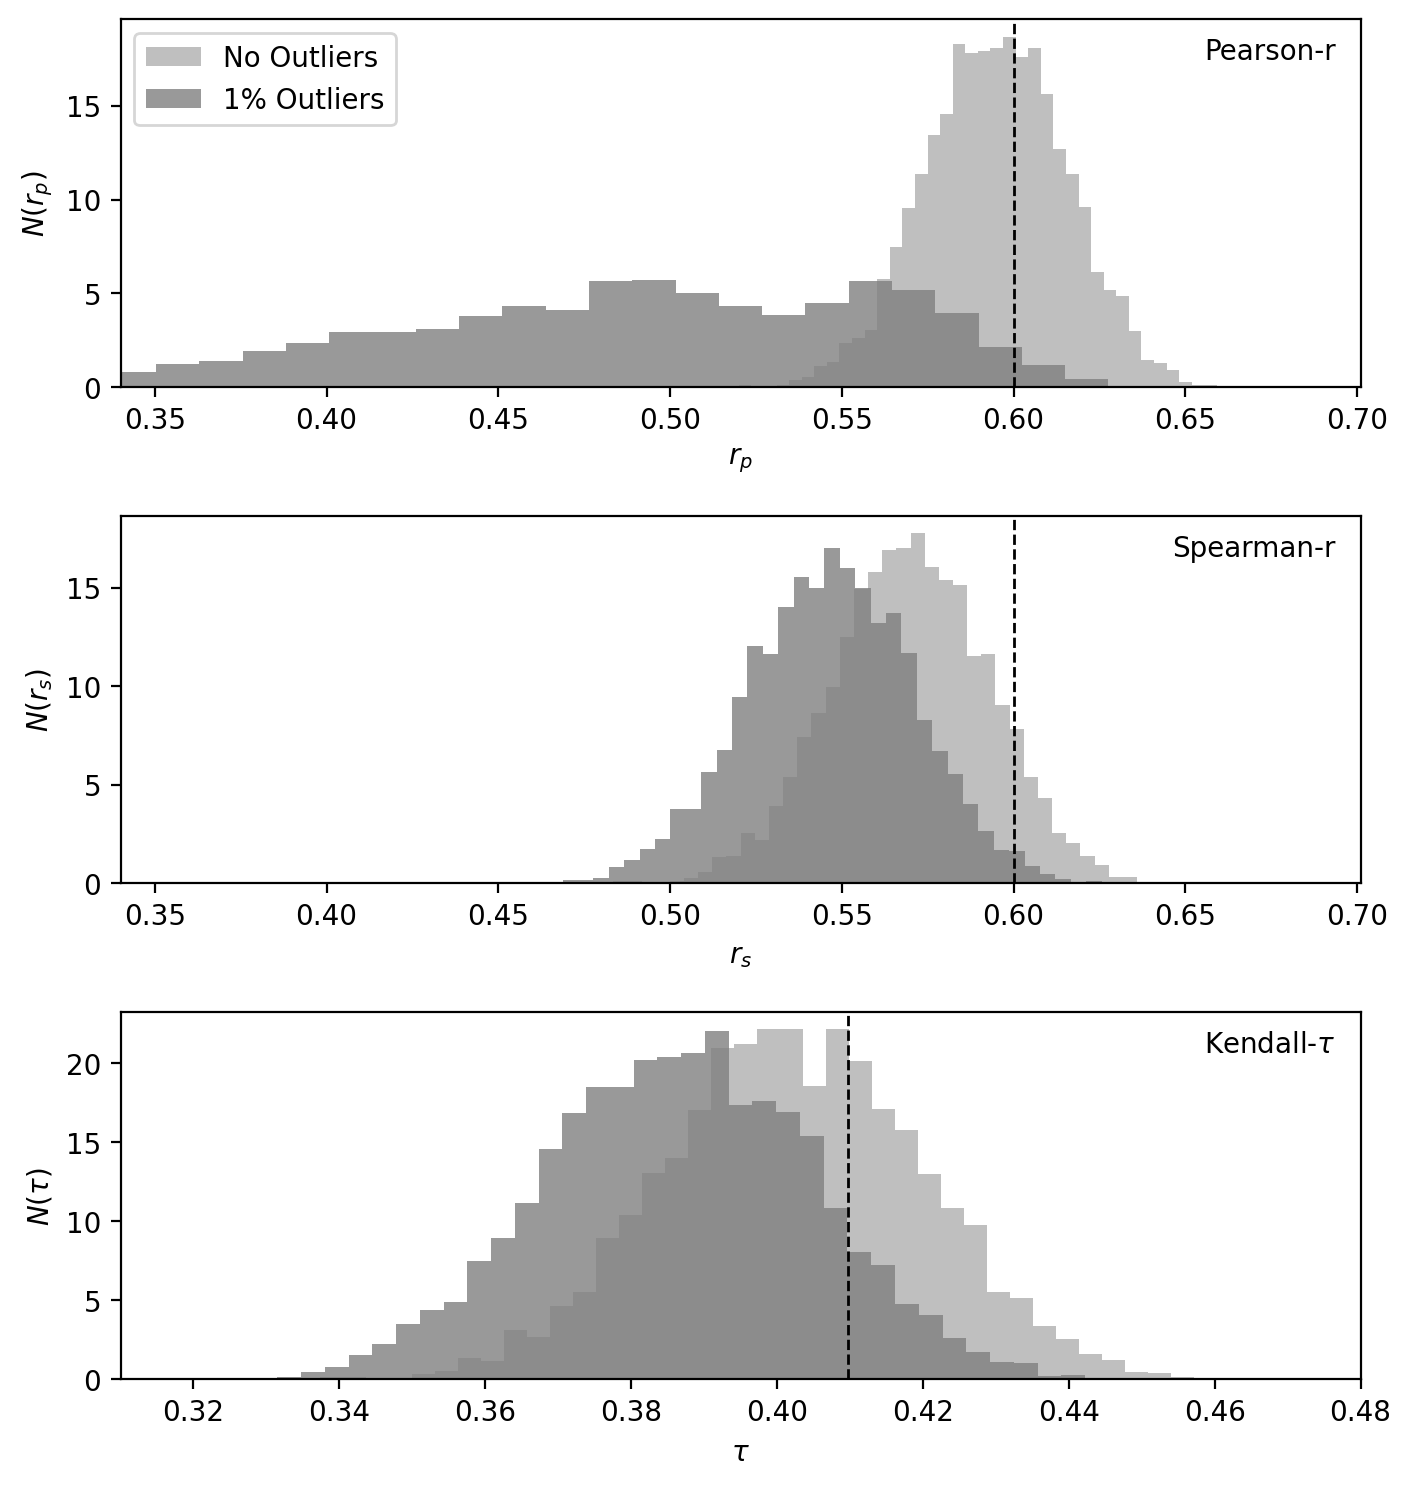

In [26]:
"""
Correlation estimates
---------------------
Figure 3.24.
Bootstrap estimates of the distribution of Pearson's, Spearman's, and Kendall's
correlation coefficients based on 5000 resamplings of the 1000 points shown
in figure 3.23. The true values are shown by the dashed lines. It is clear
that Pearson's correlation coefficient is not robust to contamination.
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

from astroML.stats.random import bivariate_normal
from astroML.utils.decorators import pickle_results

# percent sign must be escaped if usetex=True
import matplotlib
if matplotlib.rcParams.get('text.usetex'):
    pct = '\%'
else:
    pct = '%'


#------------------------------------------------------------
# Set parameters for the distributions
Nbootstraps = 5000 # number of bootstrap resamplings
N = 1000 # number of data points

sigma1 = 2.0 # standard deviation in x
sigma2 = 1.0 # standard deviation in y
mu = (10.0, 10.0) # means of x and y
alpha_deg = 45.0 # angle of correlation in degrees
alpha = alpha_deg * np.pi / 180 # angle of correlation in radians
f = 0.01 # fraction of points that are outliers

#this is for a rotated covariance matrix
def rotated_correlation(sigma1, sigma2, alpha):
    """
    Computes the correlation coefficient after rotating a bivariate normal
    with variances sigma1^2 and sigma2^2 by angle alpha (in radians).
    """
    s1_sq = sigma1 ** 2
    s2_sq = sigma2 ** 2
    sin_a = np.sin(alpha)
    cos_a = np.cos(alpha)
    
    numerator = (s1_sq - s2_sq) * sin_a * cos_a
    denom_x = s1_sq * cos_a**2 + s2_sq * sin_a**2
    denom_y = s1_sq * sin_a**2 + s2_sq * cos_a**2
    denominator = np.sqrt(denom_x * denom_y)
    
    return numerator / denominator if denominator != 0 else 0.0

# compute the correlation coefficient for the distribution
rho = rotated_correlation(sigma1, sigma2, alpha)
print("Correlation coefficient:", rho)

#------------------------------------------------------------
# sample the distribution
# without outliers and with outliers
np.random.seed(0) # for reproducibility
X = bivariate_normal(mu, sigma1, sigma2, alpha, N) # no outliers

X_out = X.copy() # with outliers
X_out[:int(f * N)] = bivariate_normal(mu, 2, 5,
                                      45 * np.pi / 180., int(f * N)) # outliers, these have different sigmas and a different correlation angle

# true values of rho (pearson/spearman r) and tau
# tau value comes from Eq. 41 of arXiv:1011.2009
rho_true = 0.6 # true correlation coefficient
tau_true = 2 / np.pi * np.arcsin(rho_true) # true kendall tau


#------------------------------------------------------------
# Create a function to compute the statistics.  Since this
#  takes a while, we'll use the "pickle_results" decorator
#  to save the results of the computation to disk
@pickle_results('fig_correlations_dump.pkl') # filename to save to
def compute_results(N, Nbootstraps): # compute the bootstrap results
    results = np.zeros((3, 2, Nbootstraps)) # array to hold results

    for k in range(Nbootstraps): # bootstrap resampling
        ind = np.random.randint(N, size=N)
        for j, data in enumerate([X, X_out]): # no outliers, with outliers
            x = data[ind, 0]
            y = data[ind, 1]
            for i, statistic in enumerate([stats.pearsonr,
                                           stats.spearmanr,
                                           stats.kendalltau]):
                results[i, j, k] = statistic(x, y)[0]

    return results # return the results

results = compute_results(N, Nbootstraps) # actually compute the results

#------------------------------------------------------------
# Plot the results in a three-panel plot
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(bottom=0.1, top=0.95, hspace=0.35) # adjust spacing

histargs = (dict(alpha=0.5, label='No Outliers'),
            dict(alpha=0.8, label='%i%s Outliers' % (int(f * 100), pct))) # histogram arguments

distributions = ['Pearson-r', 'Spearman-r', r'Kendall-$\tau$'] # distribution names
xlabels = ['r_p', 'r_s', r'\tau'] # x-axis labels

for i in range(3):
    ax = fig.add_subplot(311 + i)
    for j in range(2):
        ax.hist(results[i, j], 40, histtype='stepfilled', fc='gray',
                density=True, **histargs[j])

    if i == 0:
        ax.legend(loc=2)

    ylim = ax.get_ylim()
    if i < 2:
        ax.plot([rho_true, rho_true], ylim, '--k', lw=1)
        ax.set_xlim(0.34, 0.701)
    else:
        ax.plot([tau_true, tau_true], ylim, '--k', lw=1)
        ax.set_xlim(0.31, 0.48)
    ax.set_ylim(ylim)

    ax.text(0.98, 0.95, distributions[i], ha='right', va='top',
            transform=ax.transAxes)

    ax.set_xlabel('$%s$' % xlabels[i])
    ax.set_ylabel('$N(%s)$' % xlabels[i])

plt.show()

Let's pause for a second to see the power of checkpointing in computing! Try running the cell again and again (because it is saved in a pkl file it is very fast to recompute). 

Note that we they used: 
$$ \rho_{\rm true}
= \frac{\frac{1}{2} (\sigma_1^2 - \sigma_2^2) \sin(2\alpha)} {\sqrt{[\sigma_1^2 \cos^2\alpha + \sigma_2^2 \sin^2\alpha][\sigma_1^2 \sin^2\alpha + \sigma_2^2 \cos^2\alpha]}}$$
to obtain the true correlation coefficient given the angle $\alpha$ and $\sigma_x  = 2$ and $\sigma_y = 1$. Assignment: Derive this expression starting from a given bivariate distribution with $\sigma_x$ and $\sigma_y$ and rotating this with an angle $\alpha$. Solution below (but we probably should make this an exercise). 

The correlation coefficient is given by:
$$ \rho = \frac{\text{Cov}(x, y)}{\sigma_x \sigma_y} $$

In the principal-axis basis, the covariance matrix is diagonal:
$$
\Lambda =
\begin{pmatrix}
\sigma_1^2 & 0 \\
0 & \sigma_2^2
\end{pmatrix}.
$$

To express the covariance matrix in the original coordinate basis,
we rotate by $\alpha$ using the rotation matrix
$$
R(\alpha) =
\begin{pmatrix}
\cos\alpha & -\sin\alpha \\
\sin\alpha &  \cos\alpha
\end{pmatrix}.
$$

Writing $c = \cos\alpha$ and $s = \sin\alpha$, this becomes
$$
\Sigma =
\begin{pmatrix}
c & -s \\
s &  c
\end{pmatrix}
\begin{pmatrix}
\sigma_1^2 & 0 \\
0 & \sigma_2^2
\end{pmatrix}
\begin{pmatrix}
c & s \\
-\,s & c
\end{pmatrix}.
$$

Carrying out the multiplication yields the covariance matrix components
$$
\Sigma_{11} = c^2 \sigma_1^2 + s^2 \sigma_2^2,
\qquad
\Sigma_{22} = s^2 \sigma_1^2 + c^2 \sigma_2^2,
\qquad
\Sigma_{12} = cs(\sigma_1^2 - \sigma_2^2).
$$

Thus the covariance matrix in the original coordinate system is
$$
\Sigma =
\begin{pmatrix}
c^2\sigma_1^2 + s^2\sigma_2^2 &
cs(\sigma_1^2 - \sigma_2^2) \\
cs(\sigma_1^2 - \sigma_2^2) &
s^2\sigma_1^2 + c^2\sigma_2^2
\end{pmatrix}.
$$

Then we use the the first equation to obtain the correlation coefficient: 
$$
\rho = \frac{\Sigma_{12}}{\Sigma_{11} \Sigma_{22}} = \frac{\cos \alpha \sin \alpha (\sigma_1^2 - \sigma_2^2)}{(\cos^2\alpha\sigma_1^2 + \sin^2 \alpha \sigma_2^2)* (\sin^2 \alpha\sigma_1^2 + \cos^2 \alpha\sigma_2^2)}
$$
which can be simplified to 
$$
\rho = \frac{\frac{1}{2} (\sigma_1^2 - \sigma_2^2) \sin(2\alpha)} {\sqrt{[\sigma_1^2 \cos^2\alpha + \sigma_2^2 \sin^2\alpha][\sigma_1^2 \sin^2\alpha + \sigma_2^2 \cos^2\alpha]}}$$


Also see how Spearman's test provides a biased estimator (with respect to the truth, both with and without outliers).

**Hang on hang on!** How on Earth did you compute a distribution of from a single dataset?! It's called "bootstrap" and it's a very powerful tecnique. We'll see it in a bit.

>## Sampling from arbitrary distributions 

Numerical simulations of the measurment process are often the only practical way to assess the complicated influences of selection effects, biases, and other processing stages of data taking. Such approaches are often called **Monte Carlo simulations**, producing **Monte Carlo or mock samples**. It is often highly beneficial to resample from arbitrary distributions in order to simulate further measurements.

Imagine you've got an arbitrary distribution $h(x)$ in analytic or histogram form (or alternatively just samples from it). How do you make more samples if it's not one of the standard distributions in `numpy` or `scipy`? We'll discuss the 1D case here in two ways. **Rejection sampling** (less preferred) and **Inverse transform sampling** (highly preferred and easy). But in high dimensions rejection sampling might be the only way forward.

Also, rejection sampling is somewhat easier to implement and could be a good for quick-and-dirty explorations. 



**EXAMPLE 1: Rejection sampling**

The process for sampling from an arbitrary distribution with rejection is:

1) Decide on a straightforward *proposal distribution* $q(x)$ to propose new samples. It should be wide enough to capture the tails of $h(x)$ (our arbitrary distribution). We'll use a uniform distribution here.

2) Generate a random sample from $q(x)$, $x_i$.

3) Now generate a random sample, $u$, from a uniform distribution in the range $[0,\mathrm{max}(h(x))]$, where the upper bound should be as large or larger than the maximum density of $h(x)$. (This could be worked out analytically or by histograming the data.)

4) If $u\leq h(x_i)$ accept the point, or else reject it and try again from step 2.


This is shown pictorally here (image reproduced by [Robert Collins class CSE586 "Computer Vision II" at PSU](http://www.cse.psu.edu/~rtc12/CSE586/))

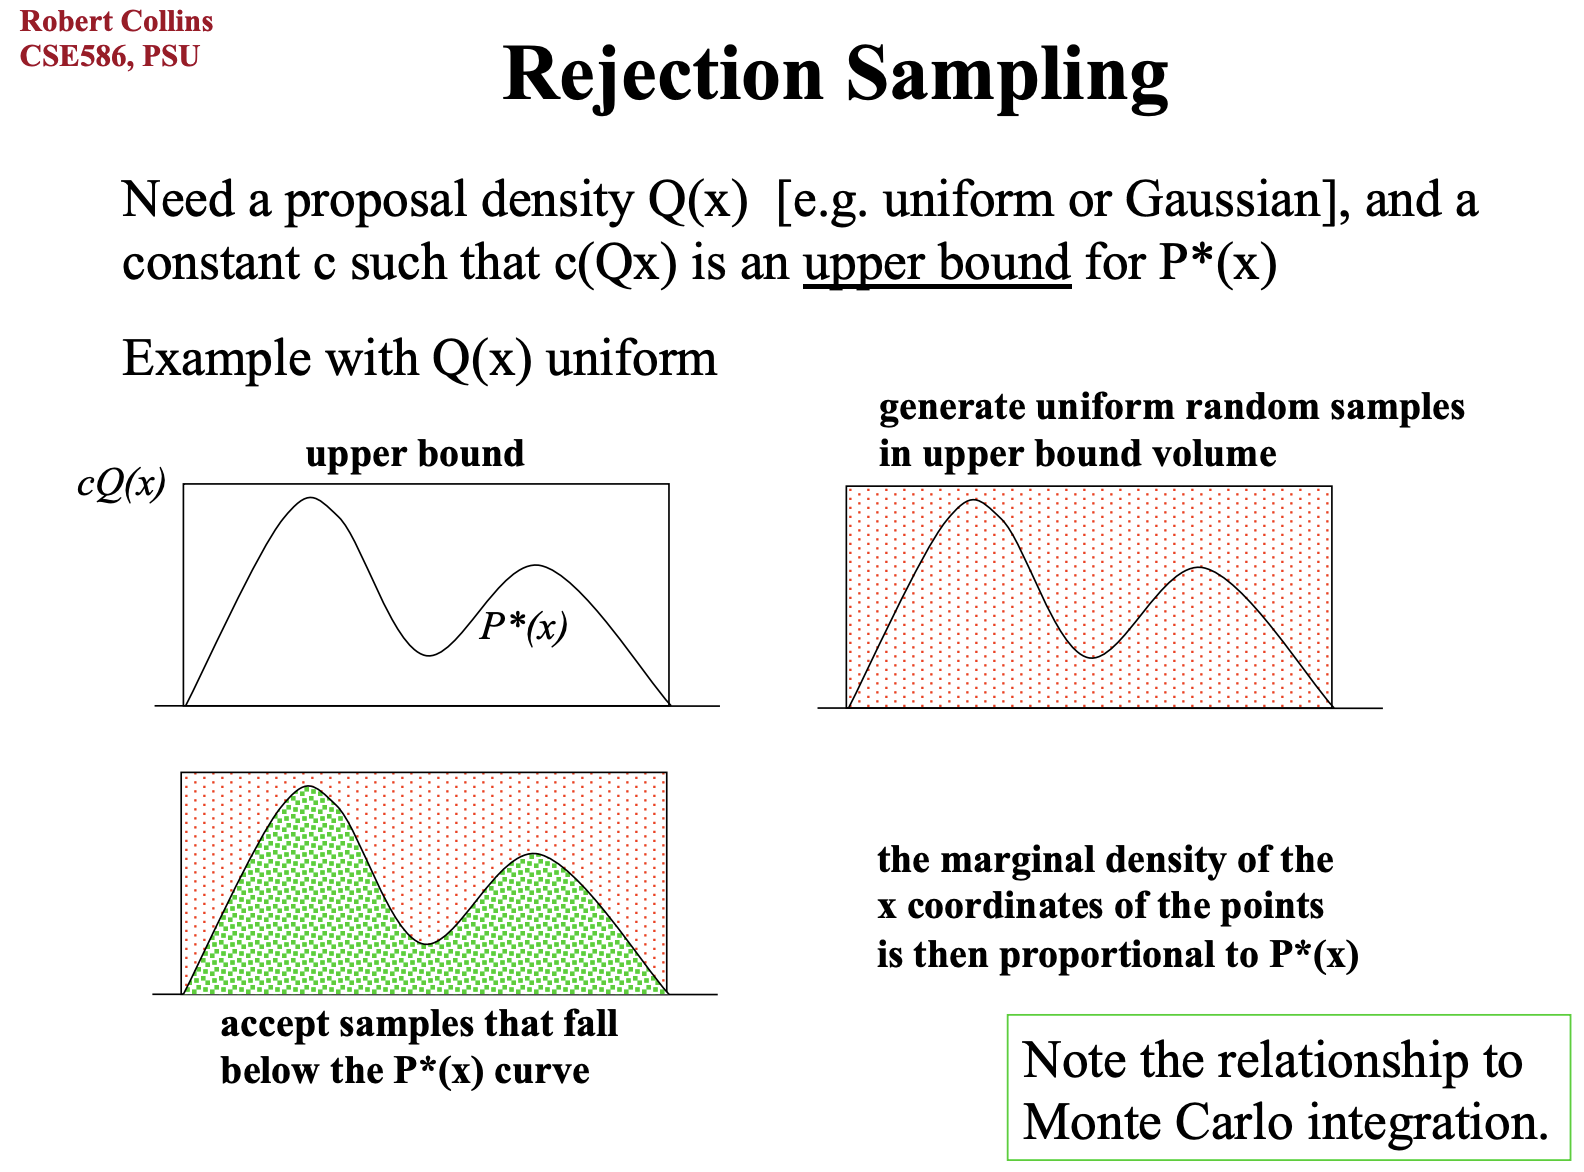

Let's try this for a simple case. Sample from $$p(x)\propto x+\sin(x),$$ between 0 and 10.

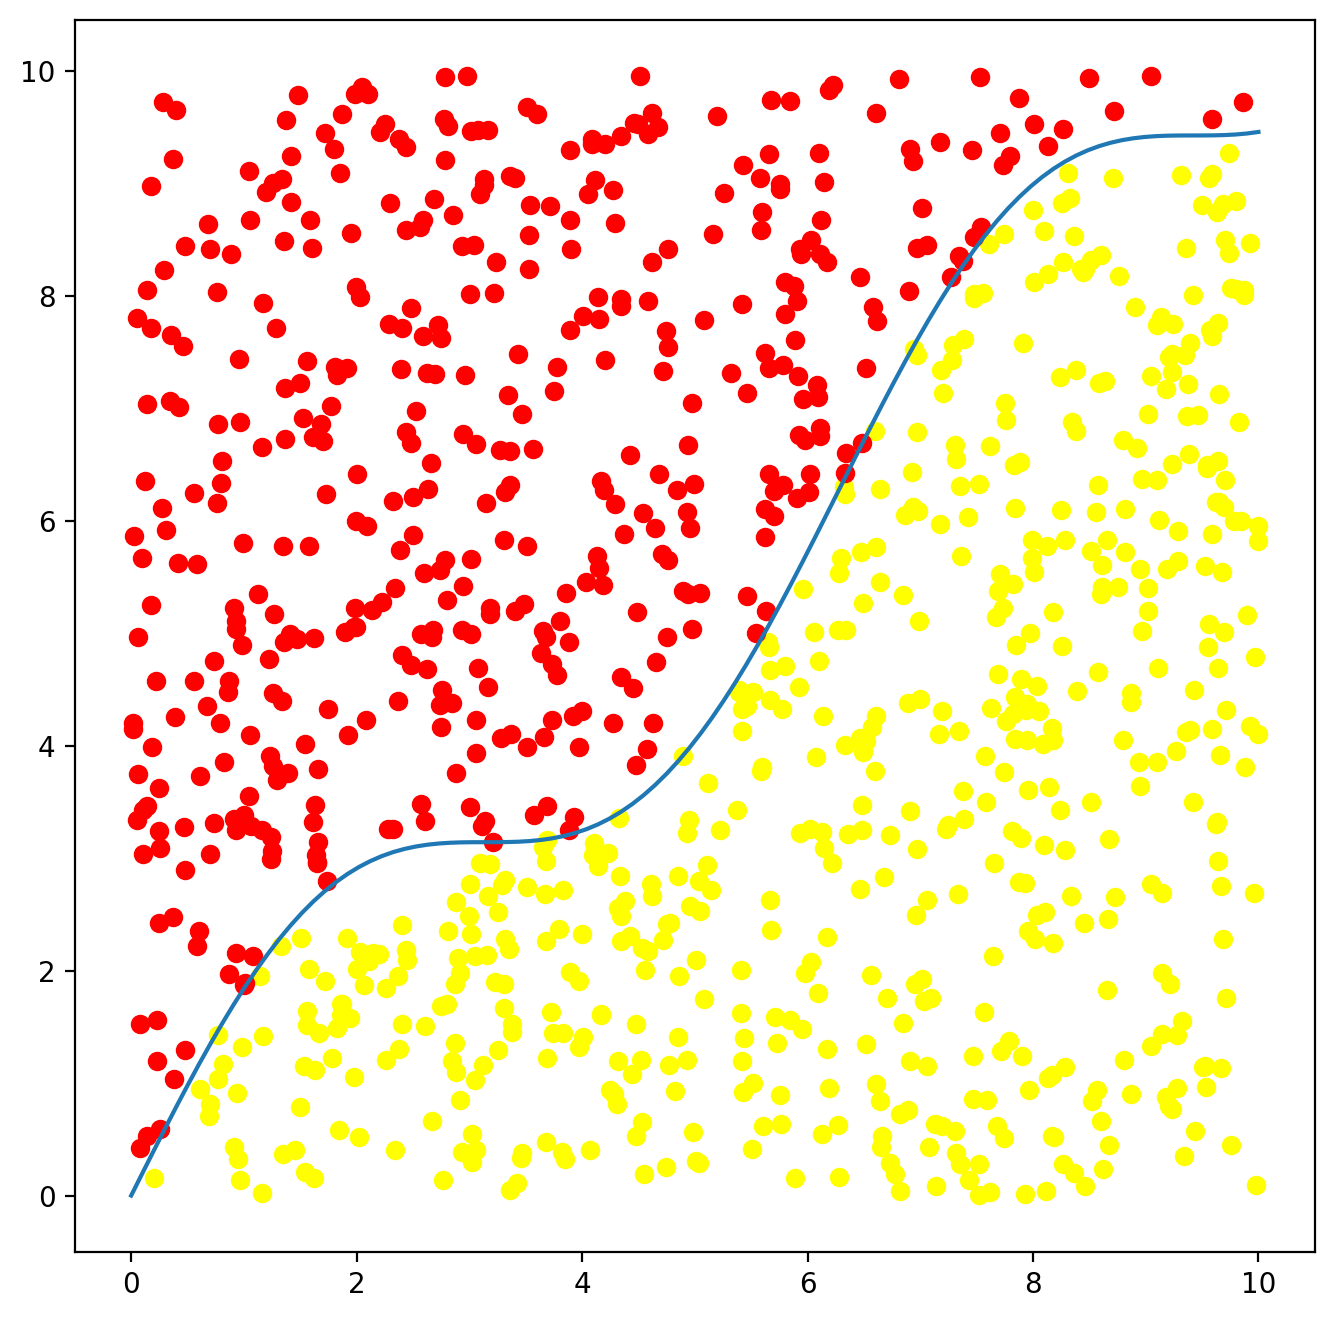

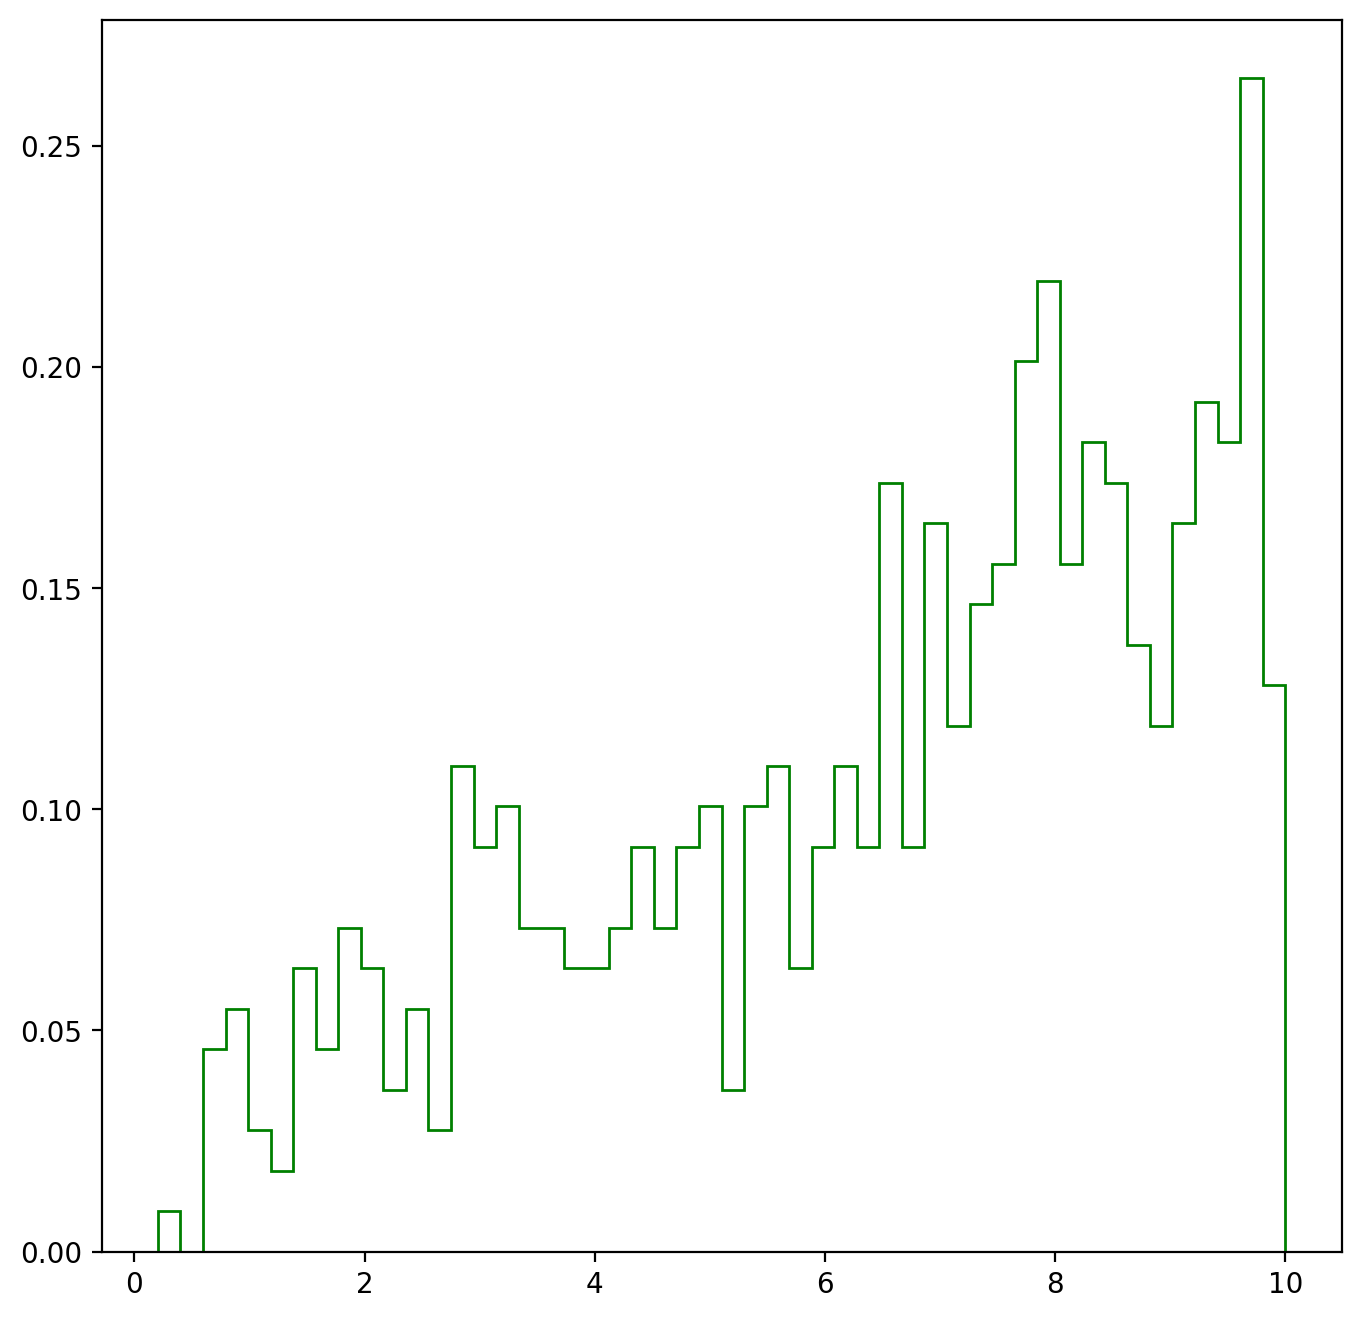

In [27]:
f = lambda x: x+np.sin(x)  # pause and look at how great lambda functions are! 

N=1000 # number of random points to draw

xg = np.linspace(0,10,100) # x grid for function plot

plt.plot(xg,f(xg)) # plot the function


ymax = 10 # maximum y value for random points
x = np.random.uniform(0,10,N) # random x values
y = np.random.uniform(0,ymax,N) # random y values


plt.scatter(x[y<f(x)],y[y<f(x)],c='yellow') # plot points below the curve in yellow
plt.scatter(x[y>f(x)],y[y>f(x)],c='red') # plot points above the curve in red

plt.show()
goodpoints = x[y<f(x)] # x values of points below the curve


plt.hist(goodpoints,bins=50,density=True,histtype='step',color='green'); # histogram of good points


**EXAMPLE 2: Inverse transform sampling**

Rejection sampling works, but wouldn't it be awesome if we didn't have to discard *any* points during our sampling? This is the power and simplicity of **inverse transform sampling**. The process is exceedingly simple. 

1) To sample from an arbitrary $h(x)$, you will also need the cdf $H(x)$ and its inverse, the quantile function $H^{-1}(x)$. If $h(x)$ is difficult to integrate, or $H(x)$ is difficult to invert to get the quantile function, then you could use numerical techniques to interpolate or produce lookup tables.

2) Generate a random sample $u$ from a uniform random distribution $[0,1]$. 

3) Using the quantile function $H^{-1}(x)$, find the value of $x$ below which a fraction $u$ of the distribution is contained. 

4) The $x$ value you get is a random sample from $h(x)$. Easy, right?


What is a quantile function? Let $X$ be a real-valued random variable with cumulative distribution
function (CDF)
$$
H(x) = P(X \le x).
$$
The quantile function of $X$ (also called the inverse CDF)
is defined as
$$
H^{-1}(u) = \inf\{x \in \mathbb{R} : H(x) \ge u\},
\qquad 0 < u < 1.
$$
Intuitively, while the CDF tells us the probability that $X$
is below a given value $x$, the quantile function tells us the value of
$x$ at which the CDF reaches a specified probability level $u$.
For example,
$$
H^{-1}(0.5) \text{ is the median}, \qquad \\
H^{-1}(0.95) \text{ is the 95\% quantile}.
$$

Here is a fully developed example from the textbook. Note that there are some steps in here that we can only understand at some later point. I do not want you to worry about this now. 

KS test: D = 0.0028; p = 1


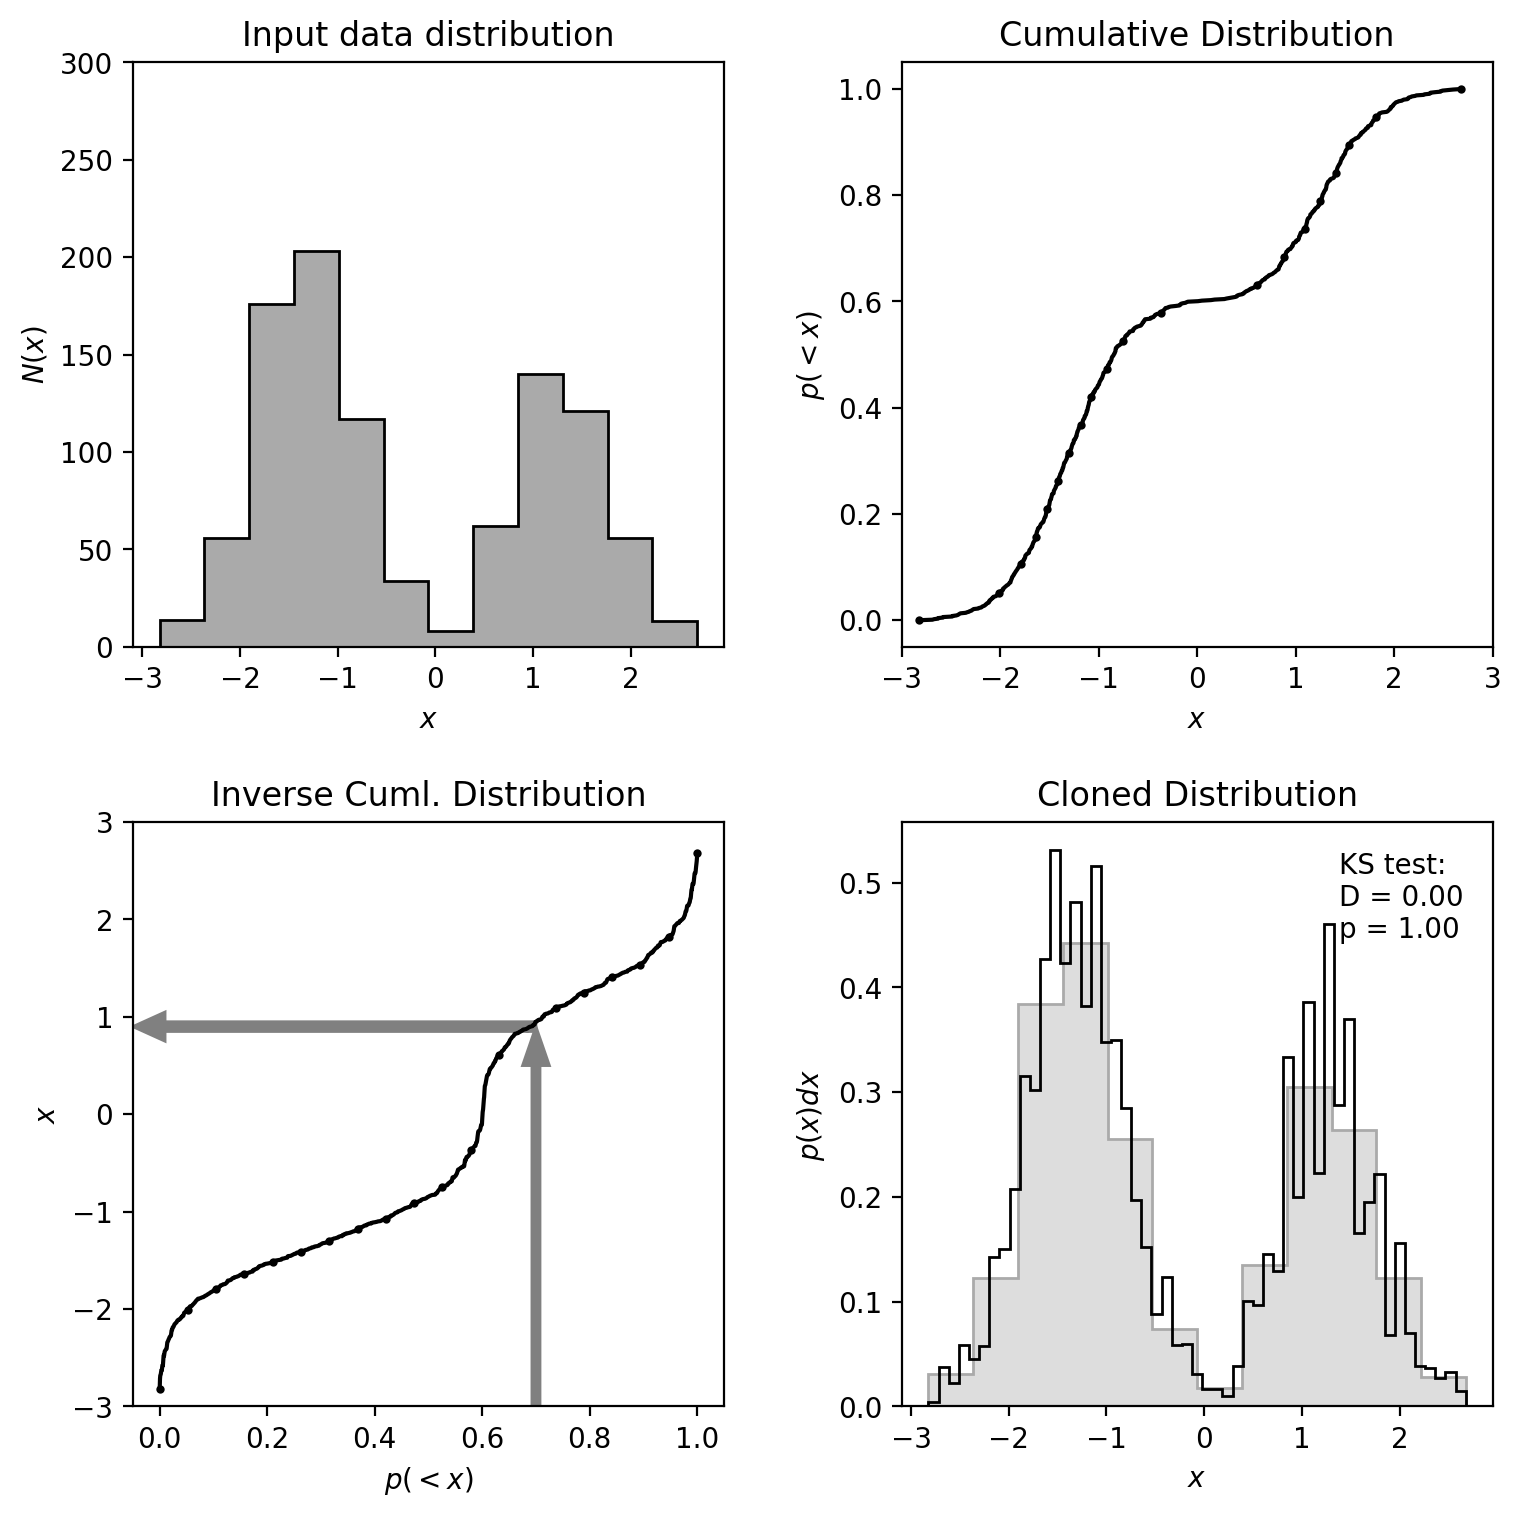

In [29]:
r"""
Random Values from an Empirical Distribution
--------------------------------------------
Figure 3.25.
A demonstration of how to empirically clone a distribution, using a spline
interpolation to approximate the inverse of the observed cumulative
distribution (H(x)^-1). This allows us to nonparametrically select new random samples
approximating an observed distribution. First the list of points is sorted,
and the rank of each point is used to approximate the cumulative distribution
(upper right). Flipping the axes gives the inverse cumulative distribution on
a regular grid (lower left). After performing a cubic spline fit to the inverse
distribution, a uniformly sampled x value maps to a y value which approximates
the observed pdf. The lower-right panel shows the result. The K-S test
(see section 4.7.2) indicates that the samples are consistent with being
drawn from the same distribution. This method, while fast and effective,
cannot be easily extended to multiple dimensions.
This example uses the routine
:class:`astroML.density_estimation.EmpiricalDistribution`
to clone the distribution
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from __future__ import print_function # for Python 2/3 compatibility

import numpy as np
from matplotlib import pyplot as plt
from scipy import stats, interpolate
from astropy.visualization import hist
from astroML.density_estimation import EmpiricalDistribution

#------------------------------------------------------------
# Create a distribution and clone it
Ndata = 1000 # number of data points
Nclone = 100000 # number of points to clone
np.random.seed(0) # for reproducibility

# generate an 'observed' bimodal distribution with 10000 values
dists = (stats.norm(-1.3, 0.5), stats.norm(1.3, 0.5)) # two normal distributions
fracs = (0.6, 0.4) # their relative fractions
x = np.hstack([d.rvs(int(f * Ndata)) for d, f in zip(dists, fracs)]) # sample from them

# We can clone the distribution easily with this function
x_cloned = EmpiricalDistribution(x).rvs(Nclone) # generate cloned values

# compute the KS test to check if they're the same
D, p = stats.ks_2samp(x, x_cloned) # KS test
print("KS test: D = %.2g; p = %.2g" % (D, p))

#------------------------------------------------------------
# For the sake of this example, we need to calculate some
# of the partial steps used by EmpiricalDistribution

# create a cumulative distribution
x.sort() # sort the data
Px_cuml = np.linspace(0, 1, Ndata) # cumulative distribution values

# set up an interpolation of the inverse cumulative distribution
tck = interpolate.splrep(Px_cuml, x) # spline fit

# sample evenly along the cumulative distribution, and interpolate
Px_cuml_sample = np.linspace(0, 1, 10 * Ndata) # sample points
x_sample = interpolate.splev(Px_cuml_sample, tck) # interpolated x values

#------------------------------------------------------------
# Plot the cloned distribution and the procedure for obtaining it
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(hspace=0.3, left=0.1, right=0.95,
                    bottom=0.08, top=0.92, wspace=0.3)

indices = np.linspace(0, Ndata - 1, 20).astype(int) # indices for plotting points

# plot a histogram of the input
ax = fig.add_subplot(221)
hist(x, bins='knuth', ax=ax,
     histtype='stepfilled', ec='k', fc='#AAAAAA')
ax.set_ylim(0, 300)
ax.set_title('Input data distribution')
ax.set_xlabel('$x$')
ax.set_ylabel('$N(x)$')

# plot the cumulative distribution
ax = fig.add_subplot(222)
ax.scatter(x[indices], Px_cuml[indices], lw=0, c='k', s=9)
ax.plot(x, Px_cuml, '-k')
ax.set_xlim(-3, 3)
ax.set_ylim(-0.05, 1.05)
ax.set_title('Cumulative Distribution')
ax.set_xlabel('$x$')
ax.set_ylabel('$p(<x)$')

# plot the inverse cumulative distribution and spline fit
ax = fig.add_subplot(223)
ax.scatter(Px_cuml[indices], x[indices], lw=0, c='k', s=9) 
ax.plot(Px_cuml_sample, x_sample, '-k') # plot spline fit, reverse axes
ax.arrow(0.7, -3, 0, 3.5, width=0.015, fc='gray', ec='gray',
         head_width=0.05, head_length=0.4)
ax.arrow(0.7, 0.9, -0.69, 0, width=0.1, fc='gray', ec='gray',
         head_width=0.3, head_length=0.06)
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-3, 3)
ax.set_title('Inverse Cuml. Distribution')
ax.set_xlabel('$p(<x)$')
ax.set_ylabel('$x$')

# plot the resulting cloned distribution
ax = fig.add_subplot(224)
hist(x, bins='knuth', ax=ax,
     histtype='stepfilled', density=True,
     ec='#AAAAAA', fc='#DDDDDD',
     label='input data') # plot input data histogram
hist(x_cloned, bins='knuth', ax=ax,
     histtype='step', density=True,
     color='k', label='cloned data') # plot cloned data histogram
ax.set_title('Cloned Distribution')
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)dx$')
ax.text(0.74, 0.95, "KS test:\nD = %.2f\np = %.2f" % (D, p),
        ha='left', va='top', transform=ax.transAxes)

plt.show()

Note btw that this looks remarkable similar to the proxy CDF in the previous example. 

### Cloning or upsample

In the example above we have been sampling from an known function. In most application you don't have this luxury. You're only given datapoints. This called "cloning" or "upsampling", which is: I have samples from a distribution but I'm greedy and I want more. This is crucial in modern stastical application such as bootstrap and jacknife (see next lectures).

>### Assignment: Cloning Quasars 

Let's look at the redshift distributions of the quasars in the Sloan Digital Sky Survey (SDSS).

The Sloan Digital Sky Survey or SDSS is a major multi-spectral imaging and spectroscopic redshift survey using a dedicated 2.5-m wide-angle optical telescope at Apache Point Observatory in New Mexico, United States. Operations started in 1998. 

In phase 1, SDSS has released photometry data 357 million (!!!) unique sources and 1.6 million spectra. In phase 2, SDSS observed the same patch of the sky many times ("time domain astronomy", and now we're going to have LSST (and EUCLID), while we already are collecting data w DESI and DES). The latest public data release as of 2025 is SDSS Data Release 19 (DR19) with over a billion photometric objects and over 3 million spectroscopically confirmed galaxies or quasars.  

![](https://classic.sdss.org/includes/sideimages/sdss_pie2.jpg)

Download the SDSS  quasar data. There is an older version (see Davide's implementation). Here I will use the latest one, DR16. However, this is a very large file. Do not try to download unless you are on your own machine. Instead you can find the extracted redshifts in a Data folder on github (see below how to access). There many other interesting data points in the fits file that we could play with.  

In [37]:
!wget https://data.sdss.org/sas/dr16/eboss/qso/DR16Q/DR16Q_v4.fits


--2025-12-09 14:11:01--  https://data.sdss.org/sas/dr16/eboss/qso/DR16Q/DR16Q_v4.fits
Resolving data.sdss.org (data.sdss.org)... 155.101.19.133
Connecting to data.sdss.org (data.sdss.org)|155.101.19.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1718484480 (1.6G) [application/octet-stream]
Saving to: ‘DR16Q_v4.fits’

DR16Q_v4.fits       100%[===================>]   1.60G  20.3MB/s    in 3m 0s   

2025-12-09 14:14:03 (9.09 MB/s) - ‘DR16Q_v4.fits’ saved [1718484480/1718484480]



In [45]:
from astropy.io import fits
import numpy as np

# Load the FITS file
filename = "DR16Q_v4.fits"  # put your path here
with fits.open(filename) as hdul:
    data = hdul[1].data

# Extract the redshift array
z = data["Z"].astype(float)

print("Number of quasars:", len(z))
print("Redshift range: {:.3f} — {:.3f}".format(np.min(z), np.max(z)))
# Remove negative redshifts (optional but recommended)
z_clean = z[z > 0]

Number of quasars: 750414
Redshift range: -999.000 — 7.024


In [42]:
np.savez("quasar_redshifts.npz", z=z_clean) # save cleaned redshifts to a .npz file


Now students can just import the file as: 

    import numpy as np
    z_clean = np.load("../Data/quasar_redshifts.npz")["z"]


In [3]:
z_clean = np.load("../Data/quasar_redshifts.npz")["z"]

Now comes the assigment: 

- Upsample this distribution in two ways, using both rejection sampling and inverse transform.
- Check, at least visually, that the two cloned distribitions are indeed similar to the observed one (for a quantitative check, come back to this point in a few lectures)

(Hint: `scipy.stats` is your best friend)

- Think about the cosmology of quasars. How do you think they are distributed? Overplot the theorethical distribution to the measured SDSS data 

(Hint: `astropy.cosmology` is another close friend). The best-fit cosmological model from the Planck data is:

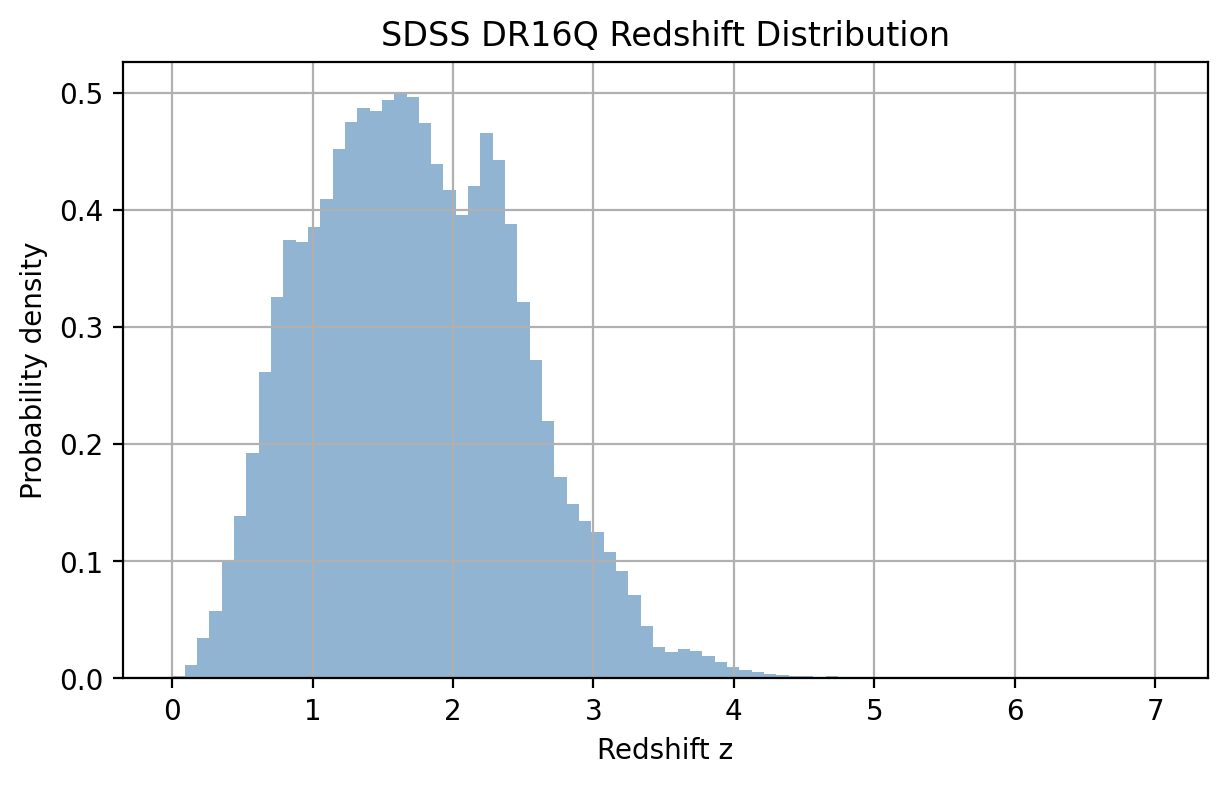

In [4]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

#let us load the data we just saved and plot the Quasar distribution as a function of redshift

plt.figure(figsize=(7,4))
plt.hist(z_clean, bins=80, alpha=0.6, density=True, color="steelblue")
plt.xlabel("Redshift z")
plt.ylabel("Probability density")
plt.title("SDSS DR16Q Redshift Distribution")
plt.grid(True)
plt.show()


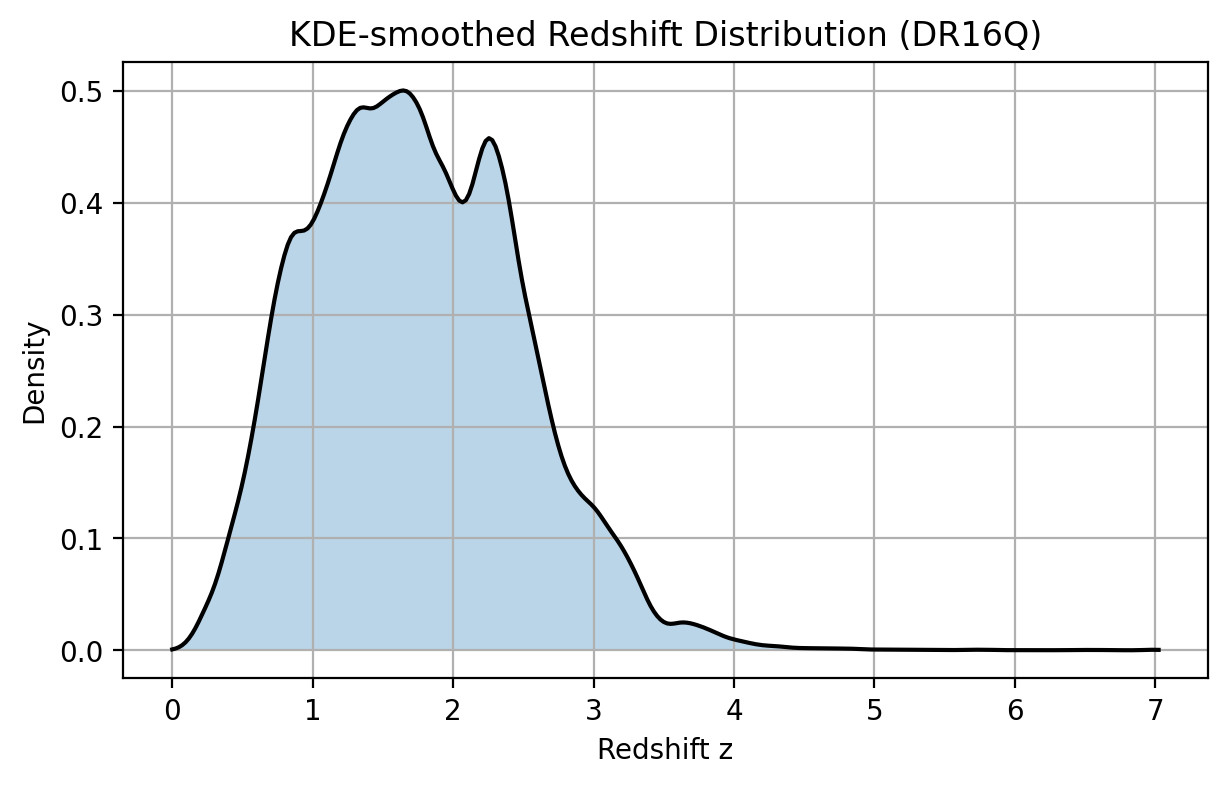

In [5]:
# Now plot the KDE-smoothed version of the redshift distribution. We can use thisto compute the CDF as well and the inverse CDF if desired.
kde = gaussian_kde(z_clean)
zs = np.linspace(0, np.max(z_clean), 300)

plt.figure(figsize=(7,4))
plt.plot(zs, kde(zs), color="black")
plt.fill_between(zs, kde(zs), alpha=0.3)
plt.xlabel("Redshift z")
plt.ylabel("Density")
plt.title("KDE-smoothed Redshift Distribution (DR16Q)")
plt.grid(True)
plt.show()


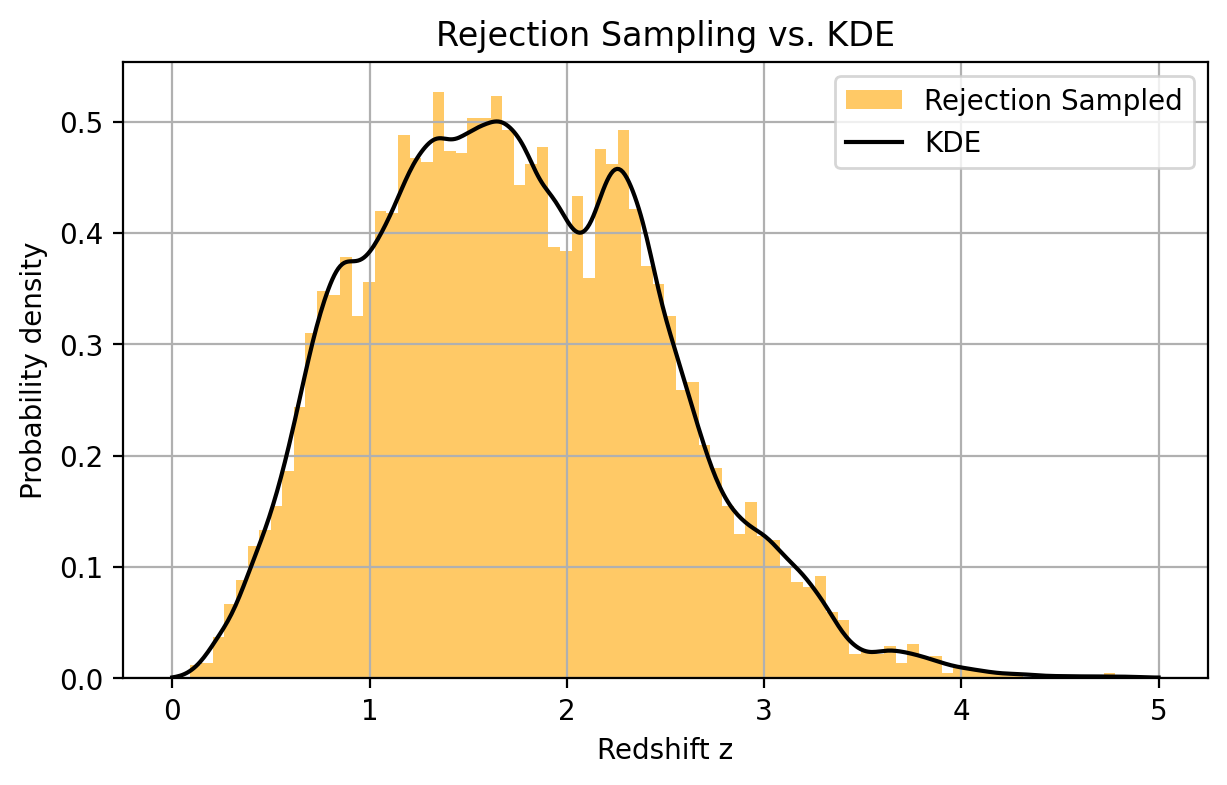

In [14]:
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import numpy as np

N_samples = 10000
z_min = 0 # minimum redshift
z_max = 5 # maximum redshift
kde = gaussian_kde(z_clean) # KDE of the redshift distribution
zs = np.linspace(z_min, z_max, 500) # z values for evaluating the KDE
kde_vals = kde(zs) # evaluate the KDE
kde_max = np.max(kde_vals) # maximum KDE value for rejection sampling

random_z = [] # list to hold accepted random redshifts
batch_size = 100 # number of random points to generate per batch

while len(random_z) < N_samples: # continue until we have enough samples
    z_rand = np.random.uniform(z_min, z_max, batch_size) # random z values
    y_rand = np.random.uniform(0, kde_max, batch_size) # random y values for rejection sampling
    kde_rand = np.interp(z_rand, zs, kde_vals) # evaluate KDE at random z values
    accepted = z_rand[y_rand < kde_rand] # accept points below the KDE curve
    random_z.extend(accepted.tolist()) # add accepted points to the list

random_z = np.array(random_z[:N_samples]) # convert to numpy array and trim to desired size

plt.figure(figsize=(7,4))
plt.hist(random_z, bins=80, alpha=0.6, density=True, color="orange", label="Rejection Sampled")
plt.plot(zs, kde_vals, color="black", label="KDE")
plt.xlabel("Redshift z")
plt.ylabel("Probability density")
plt.title("Rejection Sampling vs. KDE")
plt.legend()
plt.grid(True)
plt.show()

That looks pretty nice! So rejection sampling works. 

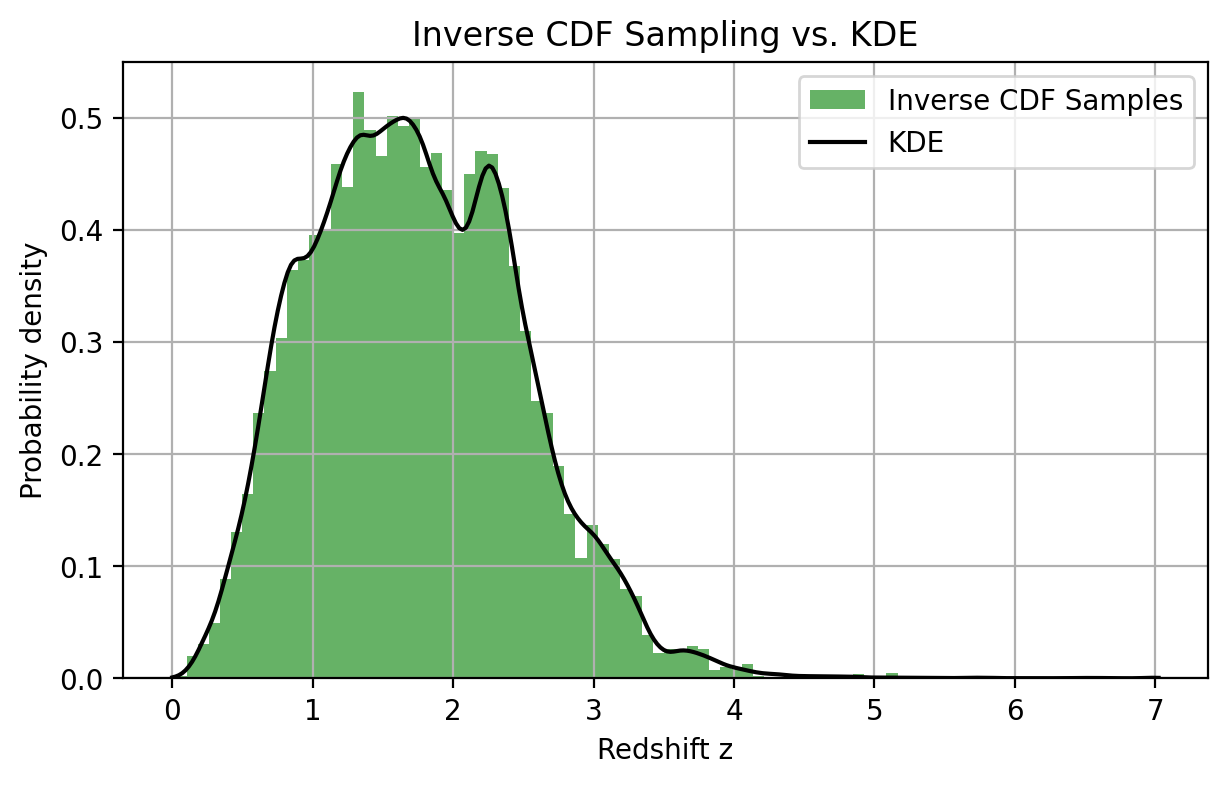

In [13]:
#let us first interpolate the KDE for faster evaluation
from scipy.interpolate import interp1d # for interpolation
kde_interp = interp1d(zs, kde_vals, bounds_error=False, fill_value=0)
# Now we can use this interpolated function to compute the CDF and inverse CDF as needed.
from scipy.stats import gaussian_kde # for KDE
import numpy as np
from scipy.integrate import cumulative_trapezoid # for cumulative integration
# Compute the CDF from the KDE using cumulative trapezoidal integration
kde = gaussian_kde(z_clean) # KDE of the redshift distribution
zs = np.linspace(0, np.max(z_clean), 300) # z values for evaluating the KDE
kde_vals = kde(zs) # evaluate the KDE
cdf_vals = cumulative_trapezoid(kde_vals, zs, initial=0) # cumulative integral to get CDF
cdf_vals /= cdf_vals[-1] # normalize CDF to 1
# Create an interpolating function for the inverse CDF
inverse_cdf = interp1d(cdf_vals, zs, bounds_error=False, fill_value=(zs[0], zs[-1]))
# Now we can generate random samples using the inverse CDF method
N_samples = 10000
u_random = np.random.uniform(0, 1, N_samples) # uniform random numbers
z_samples = inverse_cdf(u_random) # map to redshift samples
plt.figure(figsize=(7,4))
plt.hist(z_samples, bins=80, alpha=0.6, density=True, color="green", label="Inverse CDF Samples")
plt.plot(zs, kde_vals, color="black", label="KDE")
plt.xlabel("Redshift z")
plt.ylabel("Probability density")
plt.title("Inverse CDF Sampling vs. KDE")
plt.legend()
plt.grid(True)
plt.show()


So both methods seem to work and reproduce the quasar redshift distribution. In this was you can keep on generating 'mock' catalogs. 

In [33]:
import astropy
from astropy.cosmology import Planck18
astropy.cosmology.Planck18

FlatLambdaCDM(name='Planck18', H0=<Quantity 67.66 km / (Mpc s)>, Om0=0.30966, Tcmb0=<Quantity 2.7255 K>, Neff=3.046, m_nu=<Quantity [0.  , 0.  , 0.06] eV>, Ob0=0.04897)

In [35]:
#you can get each parameter like this:
H0 = Planck18.H0.value  # Hubble constant at z=0 in km/s/Mpc
Om0 = Planck18.Om0  # Omega matter at z=0

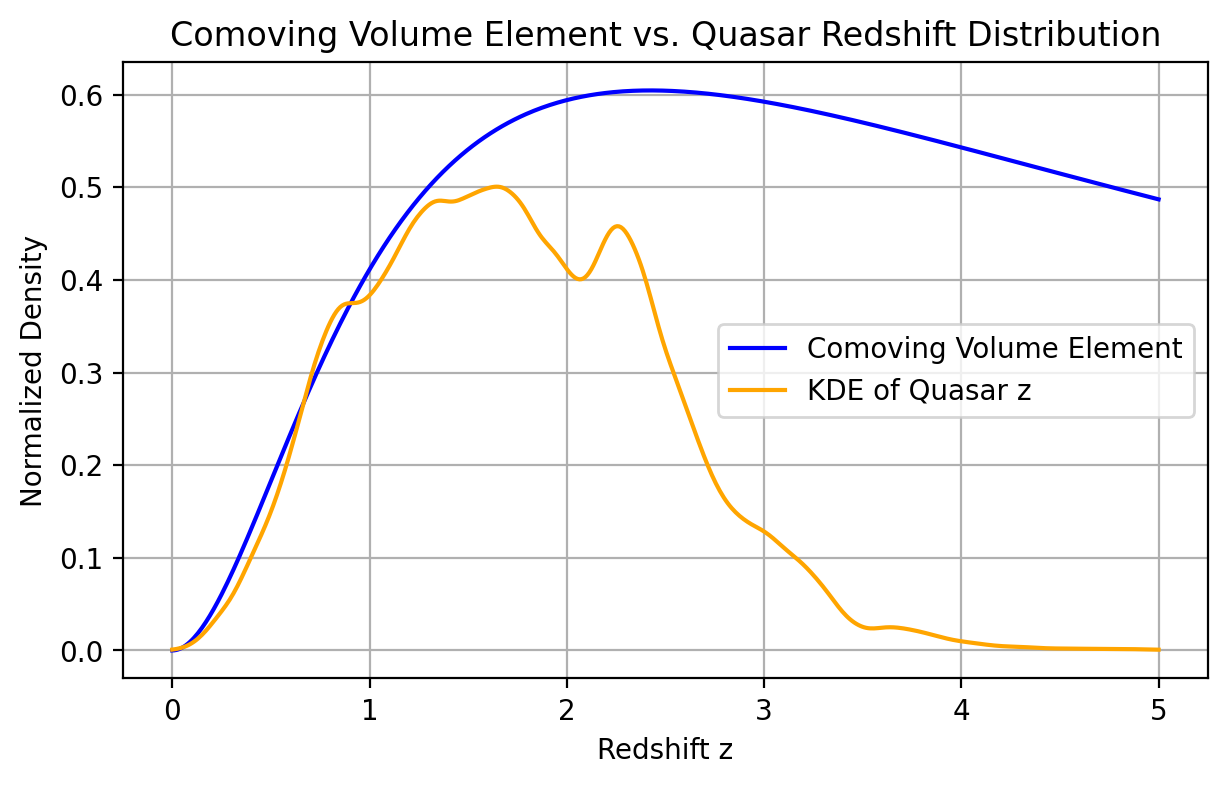

In [21]:
#now we want to compare the distribution to the comoving volume element as a function of redshift. 
# That is, we want to compute dV/dz and compare it to the KDE of the quasar redshifts. The idea is that we expect the quasar distribution to roughly follow the comoving volume element.
# What could cause a deviation? Selection effects, luminosity evolution, etc.
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import Planck18
# Define redshift range
z = np.linspace(0, 5, 500)
# Compute comoving volume element dV/dz using astropy
dV_dz = Planck18.differential_comoving_volume(z).value  # in Mpc^3 / sr / dz
# Normalize the integral for comparison
dV_dz /= np.trapezoid(dV_dz, z)  # normalize to unit integral
# Plot the results and compare to KDE of quasar redshifts
plt.figure(figsize=(7,4))
plt.plot(z, 2.4*dV_dz, label='Comoving Volume Element', color='blue') #2.4 is norm by eye, same as Davide found. 
plt.plot(zs, kde_vals/np.trapezoid(kde_vals, zs), label='KDE of Quasar z', color='orange')
plt.xlabel('Redshift z')
plt.ylabel('Normalized Density')
plt.title('Comoving Volume Element vs. Quasar Redshift Distribution')
plt.legend()
plt.grid(True)
plt.show()


[Davide's solution](https://github.com/dgerosa/astrostatistics_bicocca_2023/blob/main/solutions/S05_cloningquasars.ipynb)